# Correlation Analysis for Multiclass Anonymization

In [142]:
target = 'education-num'
print(target)

education-num


In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import pickle

from sklearn import metrics, preprocessing, model_selection
from sklearn.ensemble import GradientBoostingClassifier as GradientBoosting, RandomForestClassifier as RandomForest
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

In [144]:
k_values = {1, 3, 15, 31, 100}
k_values_finger = {3, 15, 31, 100}
rank_values = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
rank_values_finger = {"best", "middle", "worst"}
mode = "global"
measure = "utility"

In [145]:
f1_scores_GB = []
f1_scores_LR = []
f1_scores_LSVC = []
f1_scores_RF = []

# loading previously obtained results
def load_classification_results():
    for k in k_values:
        f1_scores_LR_tmp = []
        f1_scores_GB_tmp = []
        f1_scores_LSVC_tmp = []
        f1_scores_RF_tmp = []
        for rank in rank_values:
            # load results
            if k==1:
                infile = open('../data/output/ARX/' + target + '/classification-res/adult_multiclass_full', 'rb')
            else:
                infile = open('../data/output/ARX/' + target + '/classification-res/anonymized_k_' + str(k) + "_" + mode + "_" + measure + "_rank_" + str(rank), 'rb')
            scores = pickle.load(infile)
            infile.close()

            f1_scores_LR_tmp.append(scores['Logistic Regression'])
            f1_scores_GB_tmp.append(scores['Gradient Boosting'])
            f1_scores_LSVC_tmp.append(scores['Linear SVC'])
            f1_scores_RF_tmp.append(scores['Random Forest'])
        f1_scores_LR.append(f1_scores_LR_tmp)
        f1_scores_GB.append(f1_scores_GB_tmp)
        f1_scores_LSVC.append(f1_scores_LSVC_tmp)
        f1_scores_RF.append(f1_scores_RF_tmp)
        
load_classification_results()

In [146]:
# load scores

scores_k_3 = pd.read_csv('../data/output/ARX/' + target + '/scores/scores_k_' + str(3) + '.csv', index_col='rank')
scores_k_15 = pd.read_csv('../data/output/ARX/' + target + '/scores/scores_k_' + str(15) + '.csv', index_col='rank')
scores_k_31 = pd.read_csv('../data/output/ARX/' + target + '/scores/scores_k_' + str(31) + '.csv', index_col='rank')
scores_k_100 = pd.read_csv('../data/output/ARX/' + target + '/scores/scores_k_' + str(100) + '.csv', index_col='rank')

In [147]:
f1_scores_GB_finger = []
f1_scores_LR_finger = []
f1_scores_LSVC_finger = []
f1_scores_RF_finger = []

# loading previously obtained results for fingerprinting (best, middle, worst)
def load_classification_results_finger():
    for k in k_values_finger:
        f1_scores_LR_finger_tmp = []
        f1_scores_GB_finger_tmp = []
        f1_scores_LSVC_finger_tmp = []
        f1_scores_RF_finger_tmp = []
        for rank in rank_values_finger:
            infile = open('../data/output/ARX/' + target + '/classification-res/anonymized_k_' + str(k) + "_" + mode + "_" + measure + "_rank_" + str(rank), 'rb')
            scores = pickle.load(infile)
            infile.close()

            f1_scores_LR_finger_tmp.append(scores['Logistic Regression'])
            f1_scores_GB_finger_tmp.append(scores['Gradient Boosting'])
            f1_scores_LSVC_finger_tmp.append(scores['Linear SVC'])
            f1_scores_RF_finger_tmp.append(scores['Random Forest'])
        f1_scores_LR_finger.append(f1_scores_LR_finger_tmp)
        f1_scores_GB_finger.append(f1_scores_GB_finger_tmp)
        f1_scores_LSVC_finger.append(f1_scores_LSVC_finger_tmp)
        f1_scores_RF_finger.append(f1_scores_RF_finger_tmp)
        
load_classification_results_finger()

In [148]:
# load scores for fingerprinting (best, middle, worst)

scores_k_3_finger = pd.read_csv('../data/output/ARX/' + target + '/scores/scores_k_' + str(3) + '_finger' + '.csv', index_col='rank', sep=';')
scores_k_15_finger = pd.read_csv('../data/output/ARX/' + target + '/scores/scores_k_' + str(15) + '_finger' + '.csv', index_col='rank', sep=';')
scores_k_31_finger = pd.read_csv('../data/output/ARX/' + target + '/scores/scores_k_' + str(31) + '_finger' + '.csv', index_col='rank', sep=';')
scores_k_100_finger = pd.read_csv('../data/output/ARX/' + target + '/scores/scores_k_' + str(100) + '_finger' + '.csv', index_col='rank', sep=';')

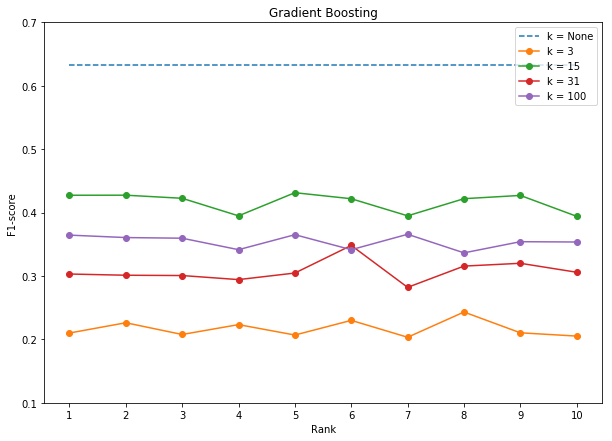

In [149]:
plt.figure(figsize=(10,7))
plt.xlabel('Rank')
plt.ylabel('F1-score')
if target == 'marital-status':    
    axes = plt.gca()
    axes.set_ylim([0.5,1.0])
elif target == 'education-num':
    axes = plt.gca()
    axes.set_ylim([0.1,0.7])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_GB[0], linestyle='--', label="k = None")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_GB[1], marker='o', label="k = 3")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_GB[2], marker='o', label="k = 15")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_GB[3], marker='o', label="k = 31")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_GB[4], marker='o', label="k = 100")
plt.title("Gradient Boosting")
plt.legend()
plt.show()

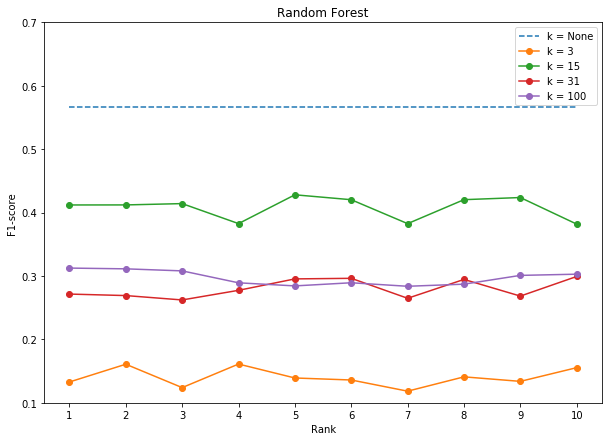

In [150]:
plt.figure(figsize=(10,7))
plt.xlabel('Rank')
plt.ylabel('F1-score')
if target == 'marital-status':    
    axes = plt.gca()
    axes.set_ylim([0.5,1.0])
elif target == 'education-num':
    axes = plt.gca()
    axes.set_ylim([0.1,0.7])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_RF[0], linestyle='--', label="k = None")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_RF[1], marker='o', label="k = 3")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_RF[2], marker='o', label="k = 15")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_RF[3], marker='o', label="k = 31")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_RF[4], marker='o', label="k = 100")
plt.title("Random Forest")
plt.legend()
plt.show()

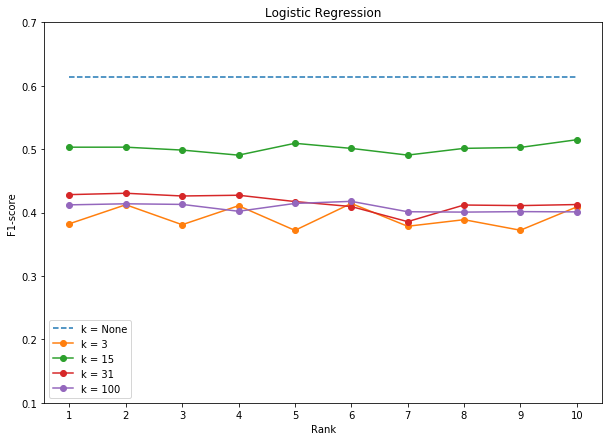

In [151]:
plt.figure(figsize=(10,7))
plt.xlabel('Rank')
plt.ylabel('F1-score')
if target == 'marital-status':    
    axes = plt.gca()
    axes.set_ylim([0.5,1.0])
elif target == 'education-num':
    axes = plt.gca()
    axes.set_ylim([0.1,0.7])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_LR[0], linestyle='--', label="k = None")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_LR[1], marker='o', label="k = 3")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_LR[2], marker='o', label="k = 15")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_LR[3], marker='o', label="k = 31")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_LR[4], marker='o', label="k = 100")
plt.title("Logistic Regression")
plt.legend()
plt.show()

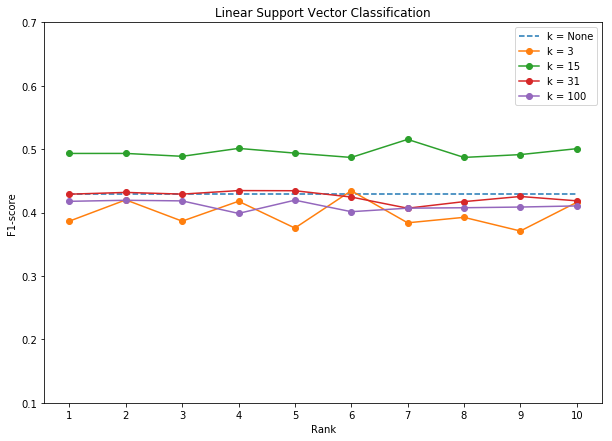

In [152]:
plt.figure(figsize=(10,7))
plt.xlabel('Rank')
plt.ylabel('F1-score')
if target == 'marital-status':    
    axes = plt.gca()
    axes.set_ylim([0.5,1.0])
elif target == 'education-num':
    axes = plt.gca()
    axes.set_ylim([0.1,0.7])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_LSVC[0], linestyle='--', label="k = None")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_LSVC[1], marker='o', label="k = 3")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_LSVC[2], marker='o', label="k = 15")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_LSVC[3], marker='o', label="k = 31")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_LSVC[4], marker='o', label="k = 100")
plt.title("Linear Support Vector Classification")
plt.legend()
plt.show()

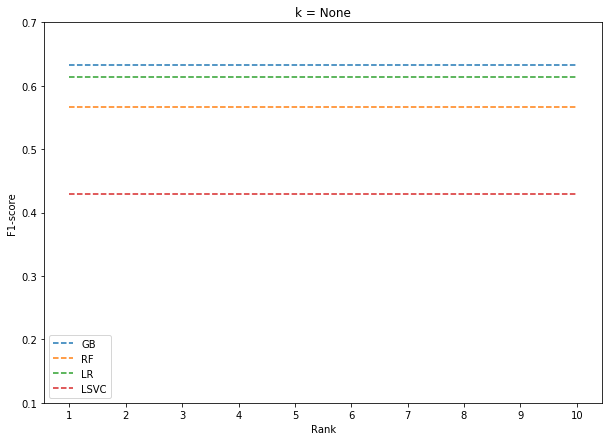

In [153]:
plt.figure(figsize=(10,7))
plt.xlabel('Rank')
plt.ylabel('F1-score')
if target == 'marital-status':    
    axes = plt.gca()
    axes.set_ylim([0.5,1.0])
elif target == 'education-num':
    axes = plt.gca()
    axes.set_ylim([0.1,0.7])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_GB[0], linestyle='--', label="GB")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_RF[0], linestyle='--', label="RF")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_LR[0], linestyle='--', label="LR")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_LSVC[0], linestyle='--', label="LSVC")
plt.title("k = None")
plt.legend()
plt.show()

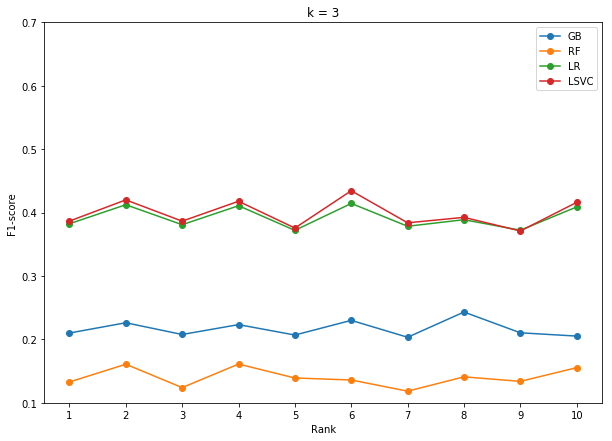

In [154]:
plt.figure(figsize=(10,7))
plt.xlabel('Rank')
plt.ylabel('F1-score')
if target == 'marital-status':    
    axes = plt.gca()
    axes.set_ylim([0.5,1.0])
elif target == 'education-num':
    axes = plt.gca()
    axes.set_ylim([0.1,0.7])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_GB[1], marker='o', label="GB")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_RF[1], marker='o', label="RF")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_LR[1], marker='o', label="LR")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_LSVC[1], marker='o', label="LSVC")
plt.title("k = 3")
plt.legend()
plt.show()

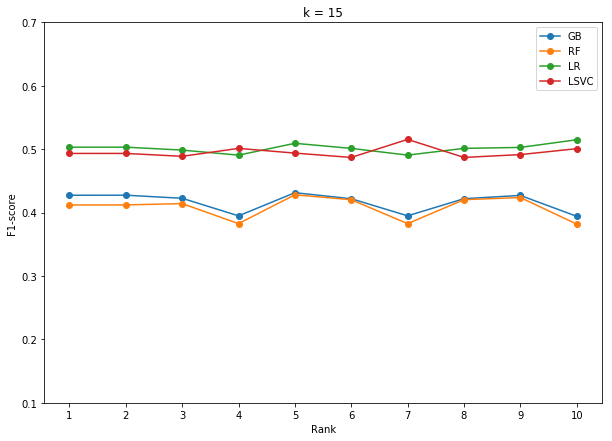

In [155]:
plt.figure(figsize=(10,7))
plt.xlabel('Rank')
plt.ylabel('F1-score')
if target == 'marital-status':    
    axes = plt.gca()
    axes.set_ylim([0.5,1.0])
elif target == 'education-num':
    axes = plt.gca()
    axes.set_ylim([0.1,0.7])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_GB[2], marker='o', label="GB")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_RF[2], marker='o', label="RF")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_LR[2], marker='o', label="LR")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_LSVC[2], marker='o', label="LSVC")
plt.title("k = 15")
plt.legend()
plt.show()

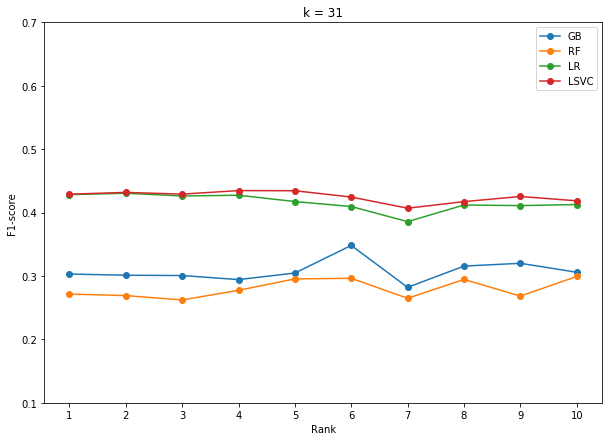

In [156]:
plt.figure(figsize=(10,7))
plt.xlabel('Rank')
plt.ylabel('F1-score')
if target == 'marital-status':    
    axes = plt.gca()
    axes.set_ylim([0.5,1.0])
elif target == 'education-num':
    axes = plt.gca()
    axes.set_ylim([0.1,0.7])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_GB[3], marker='o', label="GB")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_RF[3], marker='o', label="RF")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_LR[3], marker='o', label="LR")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_LSVC[3], marker='o', label="LSVC")
plt.title("k = 31")
plt.legend()
plt.show()

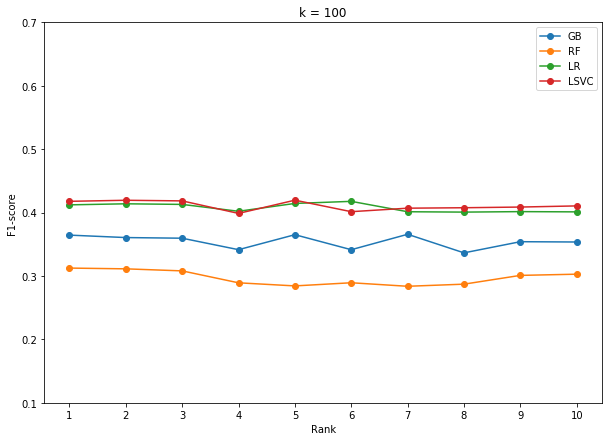

In [157]:
plt.figure(figsize=(10,7))
plt.xlabel('Rank')
plt.ylabel('F1-score')
if target == 'marital-status':    
    axes = plt.gca()
    axes.set_ylim([0.5,1.0])
elif target == 'education-num':
    axes = plt.gca()
    axes.set_ylim([0.1,0.7])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_GB[4], marker='o', label="GB")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_RF[4], marker='o', label="RF")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_LR[4], marker='o', label="LR")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_LSVC[4], marker='o', label="LSVC")
plt.title("k = 100")
plt.legend()
plt.show()

In [158]:
# LOSS

k_3_GB = np.corrcoef(f1_scores_GB[1], scores_k_3['loss'].tolist())[0, 1] * -1
k_15_GB = np.corrcoef(f1_scores_GB[2], scores_k_15['loss'].tolist())[0, 1] * -1
k_31_GB = np.corrcoef(f1_scores_GB[3], scores_k_31['loss'].tolist())[0, 1] * -1
k_100_GB = np.corrcoef(f1_scores_GB[4], scores_k_100['loss'].tolist())[0, 1] * -1

k_3_RF = np.corrcoef(f1_scores_RF[1], scores_k_3['loss'].tolist())[0, 1] * -1
k_15_RF = np.corrcoef(f1_scores_RF[2], scores_k_15['loss'].tolist())[0, 1] * -1
k_31_RF = np.corrcoef(f1_scores_RF[3], scores_k_31['loss'].tolist())[0, 1] * -1
k_100_RF = np.corrcoef(f1_scores_RF[4], scores_k_100['loss'].tolist())[0, 1] * -1

k_3_LR = np.corrcoef(f1_scores_LR[1], scores_k_3['loss'].tolist())[0, 1] * -1
k_15_LR = np.corrcoef(f1_scores_LR[2], scores_k_15['loss'].tolist())[0, 1] * -1
k_31_LR = np.corrcoef(f1_scores_LR[3], scores_k_31['loss'].tolist())[0, 1] * -1
k_100_LR = np.corrcoef(f1_scores_LR[4], scores_k_100['loss'].tolist())[0, 1] * -1

k_3_LSVC = np.corrcoef(f1_scores_LSVC[1], scores_k_3['loss'].tolist())[0, 1] * -1
k_15_LSVC = np.corrcoef(f1_scores_LSVC[2], scores_k_15['loss'].tolist())[0, 1] * -1
k_31_LSVC = np.corrcoef(f1_scores_LSVC[3], scores_k_31['loss'].tolist())[0, 1] * -1
k_100_LSVC = np.corrcoef(f1_scores_LSVC[4], scores_k_100['loss'].tolist())[0, 1] * -1

In [159]:
# GRANULARITY

k_3_GB_granularity = np.corrcoef(f1_scores_GB[1], scores_k_3['granularity'].tolist())[0, 1]
k_15_GB_granularity = np.corrcoef(f1_scores_GB[2], scores_k_15['granularity'].tolist())[0, 1]
k_31_GB_granularity = np.corrcoef(f1_scores_GB[3], scores_k_31['granularity'].tolist())[0, 1]
k_100_GB_granularity = np.corrcoef(f1_scores_GB[4], scores_k_100['granularity'].tolist())[0, 1]

k_3_RF_granularity = np.corrcoef(f1_scores_RF[1], scores_k_3['granularity'].tolist())[0, 1]
k_15_RF_granularity = np.corrcoef(f1_scores_RF[2], scores_k_15['granularity'].tolist())[0, 1]
k_31_RF_granularity = np.corrcoef(f1_scores_RF[3], scores_k_31['granularity'].tolist())[0, 1]
k_100_RF_granularity = np.corrcoef(f1_scores_RF[4], scores_k_100['granularity'].tolist())[0, 1]

k_3_LR_granularity = np.corrcoef(f1_scores_LR[1], scores_k_3['granularity'].tolist())[0, 1]
k_15_LR_granularity = np.corrcoef(f1_scores_LR[2], scores_k_15['granularity'].tolist())[0, 1]
k_31_LR_granularity = np.corrcoef(f1_scores_LR[3], scores_k_31['granularity'].tolist())[0, 1]
k_100_LR_granularity = np.corrcoef(f1_scores_LR[4], scores_k_100['granularity'].tolist())[0, 1]

k_3_LSVC_granularity = np.corrcoef(f1_scores_LSVC[1], scores_k_3['granularity'].tolist())[0, 1]
k_15_LSVC_granularity = np.corrcoef(f1_scores_LSVC[2], scores_k_15['granularity'].tolist())[0, 1]
k_31_LSVC_granularity = np.corrcoef(f1_scores_LSVC[3], scores_k_31['granularity'].tolist())[0, 1]
k_100_LSVC_granularity = np.corrcoef(f1_scores_LSVC[4], scores_k_100['granularity'].tolist())[0, 1]

In [160]:
# ENTROPY

k_3_GB_entropy = np.corrcoef(f1_scores_GB[1], scores_k_3['entropy'].tolist())[0, 1] * -1
k_15_GB_entropy = np.corrcoef(f1_scores_GB[2], scores_k_15['entropy'].tolist())[0, 1] * -1
k_31_GB_entropy = np.corrcoef(f1_scores_GB[3], scores_k_31['entropy'].tolist())[0, 1] * -1
k_100_GB_entropy = np.corrcoef(f1_scores_GB[4], scores_k_100['entropy'].tolist())[0, 1] * -1

k_3_RF_entropy = np.corrcoef(f1_scores_RF[1], scores_k_3['entropy'].tolist())[0, 1] * -1
k_15_RF_entropy = np.corrcoef(f1_scores_RF[2], scores_k_15['entropy'].tolist())[0, 1] * -1
k_31_RF_entropy = np.corrcoef(f1_scores_RF[3], scores_k_31['entropy'].tolist())[0, 1] * -1
k_100_RF_entropy = np.corrcoef(f1_scores_RF[4], scores_k_100['entropy'].tolist())[0, 1] * -1

k_3_LR_entropy = np.corrcoef(f1_scores_LR[1], scores_k_3['entropy'].tolist())[0, 1] * -1
k_15_LR_entropy = np.corrcoef(f1_scores_LR[2], scores_k_15['entropy'].tolist())[0, 1] * -1
k_31_LR_entropy = np.corrcoef(f1_scores_LR[3], scores_k_31['entropy'].tolist())[0, 1] * -1
k_100_LR_entropy = np.corrcoef(f1_scores_LR[4], scores_k_100['entropy'].tolist())[0, 1] * -1

k_3_LSVC_entropy = np.corrcoef(f1_scores_LSVC[1], scores_k_3['entropy'].tolist())[0, 1] * -1
k_15_LSVC_entropy = np.corrcoef(f1_scores_LSVC[2], scores_k_15['entropy'].tolist())[0, 1] * -1
k_31_LSVC_entropy = np.corrcoef(f1_scores_LSVC[3], scores_k_31['entropy'].tolist())[0, 1] * -1
k_100_LSVC_entropy = np.corrcoef(f1_scores_LSVC[4], scores_k_100['entropy'].tolist())[0, 1] * -1

In [161]:
# ERROR

k_3_GB_error = np.corrcoef(f1_scores_GB[1], scores_k_3['error'].tolist())[0, 1] * -1
k_15_GB_error = np.corrcoef(f1_scores_GB[2], scores_k_15['error'].tolist())[0, 1] * -1
k_31_GB_error = np.corrcoef(f1_scores_GB[3], scores_k_31['error'].tolist())[0, 1] * -1
k_100_GB_error = np.corrcoef(f1_scores_GB[4], scores_k_100['error'].tolist())[0, 1] * -1

k_3_RF_error = np.corrcoef(f1_scores_RF[1], scores_k_3['error'].tolist())[0, 1] * -1
k_15_RF_error = np.corrcoef(f1_scores_RF[2], scores_k_15['error'].tolist())[0, 1] * -1
k_31_RF_error = np.corrcoef(f1_scores_RF[3], scores_k_31['error'].tolist())[0, 1] * -1
k_100_RF_error = np.corrcoef(f1_scores_RF[4], scores_k_100['error'].tolist())[0, 1] * -1

k_3_LR_error = np.corrcoef(f1_scores_LR[1], scores_k_3['error'].tolist())[0, 1] * -1
k_15_LR_error = np.corrcoef(f1_scores_LR[2], scores_k_15['error'].tolist())[0, 1] * -1
k_31_LR_error = np.corrcoef(f1_scores_LR[3], scores_k_31['error'].tolist())[0, 1] * -1
k_100_LR_error = np.corrcoef(f1_scores_LR[4], scores_k_100['error'].tolist())[0, 1] * -1

k_3_LSVC_error = np.corrcoef(f1_scores_LSVC[1], scores_k_3['error'].tolist())[0, 1] * -1
k_15_LSVC_error = np.corrcoef(f1_scores_LSVC[2], scores_k_15['error'].tolist())[0, 1] * -1
k_31_LSVC_error = np.corrcoef(f1_scores_LSVC[3], scores_k_31['error'].tolist())[0, 1] * -1
k_100_LSVC_error = np.corrcoef(f1_scores_LSVC[4], scores_k_100['error'].tolist())[0, 1] * -1

<h3>k=3</h3>

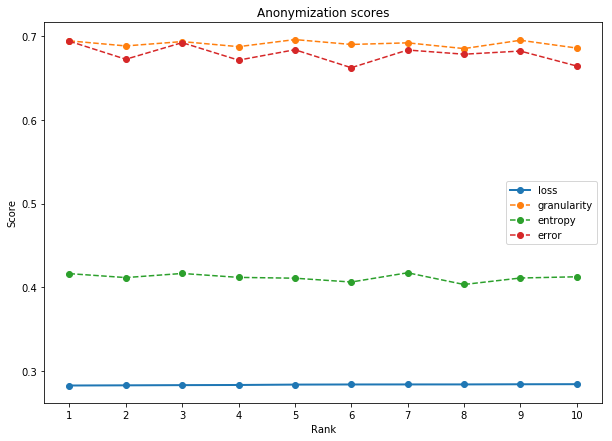

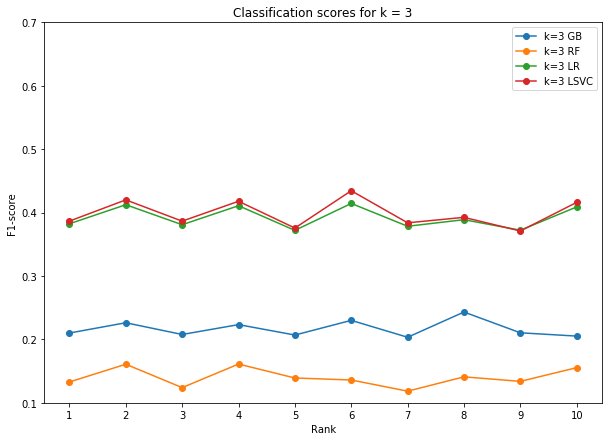

In [162]:
plt.figure(figsize=(10,7))
plt.xlabel('Rank')
plt.ylabel('Score')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], scores_k_3['loss'].tolist(), marker='o', label="loss", linewidth=2)
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], scores_k_3['granularity'].tolist(), marker='o', label="granularity", linestyle='--')
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], scores_k_3['entropy'].tolist(), marker='o', label="entropy", linestyle='--')
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], scores_k_3['error'].tolist(), marker='o', label="error", linestyle='--')
plt.title("Anonymization scores")
plt.legend()
plt.show()

plt.figure(figsize=(10,7))
plt.xlabel('Rank')
plt.ylabel('F1-score')
if target == 'marital-status':    
    axes = plt.gca()
    axes.set_ylim([0.5,1.0])
elif target == 'education-num':
    axes = plt.gca()
    axes.set_ylim([0.1,0.7])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_GB[1], marker='o', label="k=3 GB")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_RF[1], marker='o', label="k=3 RF")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_LR[1], marker='o', label="k=3 LR")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_LSVC[1], marker='o', label="k=3 LSVC")
plt.title("Classification scores for k = 3")
plt.legend()
plt.show()

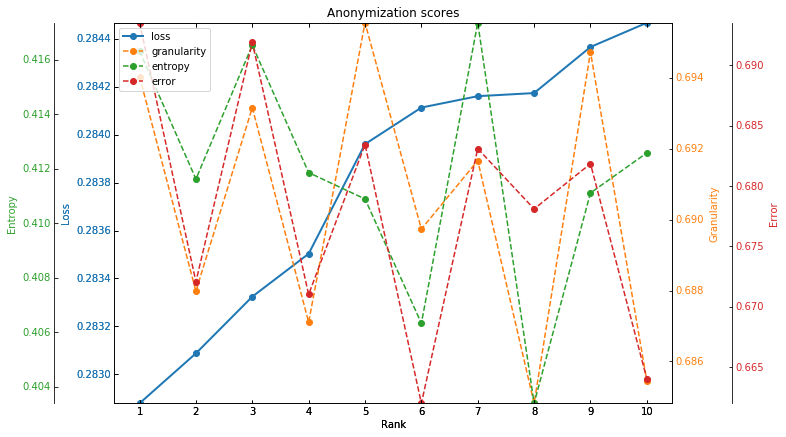

In [163]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

plt.figure(figsize=(10,7))

host = host_subplot(111, axes_class=AA.Axes)
par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()

new_fixed_axis1 = par1.get_grid_helper().new_fixed_axis
par1.axis["right"] = new_fixed_axis1(loc="right",
                                    axes=par1,
                                    offset=(0, 0))

new_fixed_axis2 = par2.get_grid_helper().new_fixed_axis
par2.axis["left"] = new_fixed_axis2(loc="left",
                                    axes=par2,
                                    offset=(-60, 0))

new_fixed_axis3 = par3.get_grid_helper().new_fixed_axis
par3.axis["right"] = new_fixed_axis3(loc="right",
                                    axes=par3,
                                    offset=(60, 0))

par2.axis["right"].toggle(all=False)

plt.xlabel('Rank')

host.set_ylabel("Loss")
par1.set_ylabel("Granularity")
par2.set_ylabel("Entropy")
par3.set_ylabel("Error")

plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
p1, = host.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], scores_k_3['loss'].tolist(), marker='o', label="loss", linewidth=2)
p2, = par1.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], scores_k_3['granularity'].tolist(), marker='o', label="granularity", linestyle='--')
p3, = par2.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], scores_k_3['entropy'].tolist(), marker='o', label="entropy", linestyle='--')
p4, = par3.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], scores_k_3['error'].tolist(), marker='o', label="error", linestyle='--')

host.set_ylim(min(scores_k_3['loss'].tolist()), max(scores_k_3['loss'].tolist()))
par1.set_ylim(min(scores_k_3['granularity'].tolist()), max(scores_k_3['granularity'].tolist()))
par2.set_ylim(min(scores_k_3['entropy'].tolist()), max(scores_k_3['entropy'].tolist()))
par3.set_ylim(min(scores_k_3['error'].tolist()), max(scores_k_3['error'].tolist()))


host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["left"].label.set_color(p3.get_color())
par3.axis["right"].label.set_color(p4.get_color())

host.axis["left"].major_ticklabels.set_color(p1.get_color())
par1.axis["right"].major_ticklabels.set_color(p2.get_color())
par2.axis["left"].major_ticklabels.set_color(p3.get_color())
par3.axis["right"].major_ticklabels.set_color(p4.get_color())

plt.title("Anonymization scores")

plt.draw()
plt.show()

<b>Correlation</b>

In [164]:
print("GB: " + str(k_3_GB))
print("RF: " + str(k_3_RF))
print("LR: " + str(k_3_LR))
print("LSVC: " + str(k_3_LSVC))

GB: 0.028537035655593023
RF: 0.12082741166400425
LR: 0.09244969709630857
LSVC: 0.07405309316486557


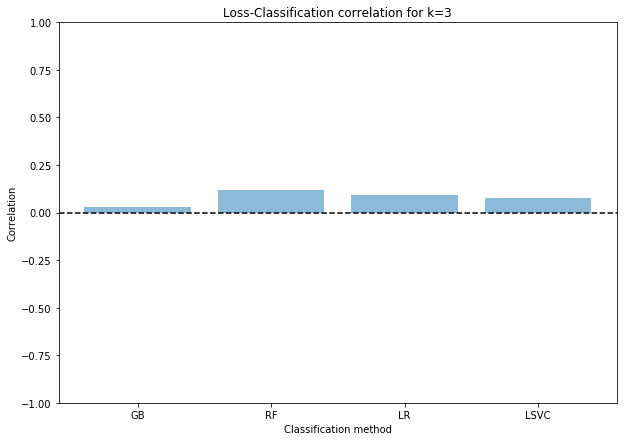

In [165]:
objects = ('GB', 'RF', 'LR', 'LSVC')
y_pos = np.arange(len(objects))
correlations = [k_3_GB, k_3_RF, k_3_LR, k_3_LSVC]

plt.figure(figsize=(10,7))
plt.axhline(0, color='k', linestyle='--')
plt.bar(y_pos, correlations, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
axes = plt.gca()
axes.set_ylim([-1,1])
plt.ylabel('Correlation')
plt.xlabel('Classification method')
plt.title('Loss-Classification correlation for k=3')

plt.show()

<h3>k=15</h3>

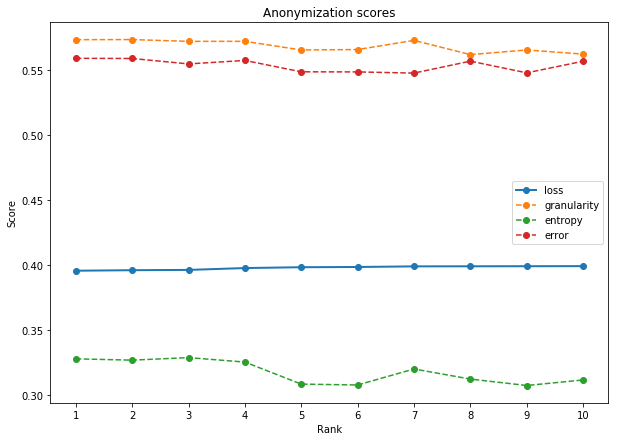

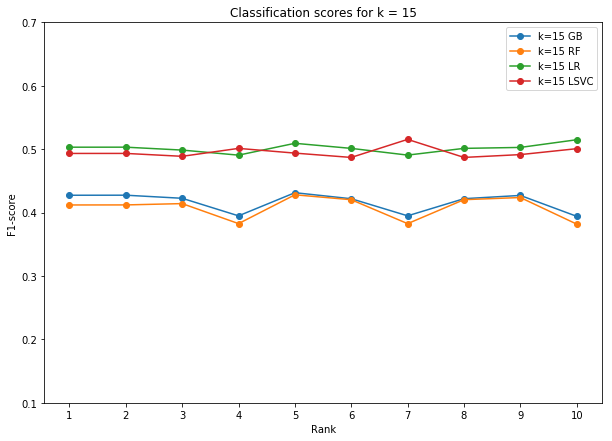

In [166]:
plt.figure(figsize=(10,7))
plt.xlabel('Rank')
plt.ylabel('Score')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], scores_k_15['loss'].tolist(), marker='o', label="loss", linewidth=2)
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], scores_k_15['granularity'].tolist(), marker='o', label="granularity", linestyle='--')
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], scores_k_15['entropy'].tolist(), marker='o', label="entropy", linestyle='--')
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], scores_k_15['error'].tolist(), marker='o', label="error", linestyle='--')
plt.title("Anonymization scores")
plt.legend()
plt.show()

plt.figure(figsize=(10,7))
plt.xlabel('Rank')
plt.ylabel('F1-score')
if target == 'marital-status':    
    axes = plt.gca()
    axes.set_ylim([0.5,1.0])
elif target == 'education-num':
    axes = plt.gca()
    axes.set_ylim([0.1,0.7])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_GB[2], marker='o', label="k=15 GB")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_RF[2], marker='o', label="k=15 RF")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_LR[2], marker='o', label="k=15 LR")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_LSVC[2], marker='o', label="k=15 LSVC")
plt.title("Classification scores for k = 15")
plt.legend()
plt.show()

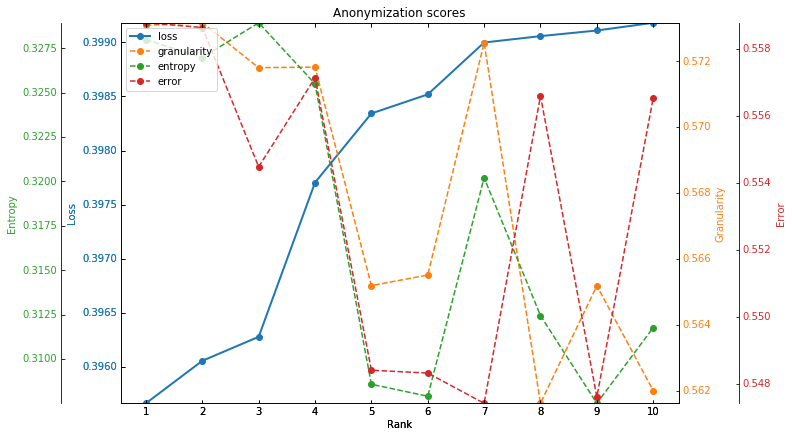

In [167]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

plt.figure(figsize=(10,7))

host = host_subplot(111, axes_class=AA.Axes)
par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()

new_fixed_axis1 = par1.get_grid_helper().new_fixed_axis
par1.axis["right"] = new_fixed_axis1(loc="right",
                                    axes=par1,
                                    offset=(0, 0))

new_fixed_axis2 = par2.get_grid_helper().new_fixed_axis
par2.axis["left"] = new_fixed_axis2(loc="left",
                                    axes=par2,
                                    offset=(-60, 0))

new_fixed_axis3 = par3.get_grid_helper().new_fixed_axis
par3.axis["right"] = new_fixed_axis3(loc="right",
                                    axes=par3,
                                    offset=(60, 0))

par2.axis["right"].toggle(all=False)

plt.xlabel('Rank')

host.set_ylabel("Loss")
par1.set_ylabel("Granularity")
par2.set_ylabel("Entropy")
par3.set_ylabel("Error")

plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
p1, = host.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], scores_k_15['loss'].tolist(), marker='o', label="loss", linewidth=2)
p2, = par1.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], scores_k_15['granularity'].tolist(), marker='o', label="granularity", linestyle='--')
p3, = par2.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], scores_k_15['entropy'].tolist(), marker='o', label="entropy", linestyle='--')
p4, = par3.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], scores_k_15['error'].tolist(), marker='o', label="error", linestyle='--')

host.set_ylim(min(scores_k_15['loss'].tolist()), max(scores_k_15['loss'].tolist()))
par1.set_ylim(min(scores_k_15['granularity'].tolist()), max(scores_k_15['granularity'].tolist()))
par2.set_ylim(min(scores_k_15['entropy'].tolist()), max(scores_k_15['entropy'].tolist()))
par3.set_ylim(min(scores_k_15['error'].tolist()), max(scores_k_15['error'].tolist()))


host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["left"].label.set_color(p3.get_color())
par3.axis["right"].label.set_color(p4.get_color())

host.axis["left"].major_ticklabels.set_color(p1.get_color())
par1.axis["right"].major_ticklabels.set_color(p2.get_color())
par2.axis["left"].major_ticklabels.set_color(p3.get_color())
par3.axis["right"].major_ticklabels.set_color(p4.get_color())

plt.title("Anonymization scores")

plt.draw()
plt.show()

<b>Correlation</b>

In [168]:
print("GB: " + str(k_15_GB))
print("RF: " + str(k_15_RF))
print("LR: " + str(k_15_LR))
print("LSVC: " + str(k_15_LSVC))

GB: 0.3854314103533077
RF: 0.14578344372612256
LR: -0.10778190892739756
LSVC: -0.24677517879306213


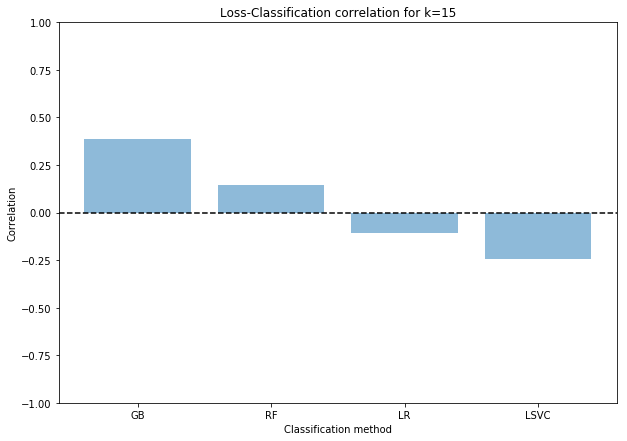

In [169]:
objects = ('GB', 'RF', 'LR', 'LSVC')
y_pos = np.arange(len(objects))
correlations = [k_15_GB, k_15_RF, k_15_LR, k_15_LSVC]

plt.figure(figsize=(10,7))
plt.axhline(0, color='k', linestyle='--')
plt.bar(y_pos, correlations, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
axes = plt.gca()
axes.set_ylim([-1,1])
plt.ylabel('Correlation')
plt.xlabel('Classification method')
plt.title('Loss-Classification correlation for k=15')

plt.show()

<h3>k=31</h3>

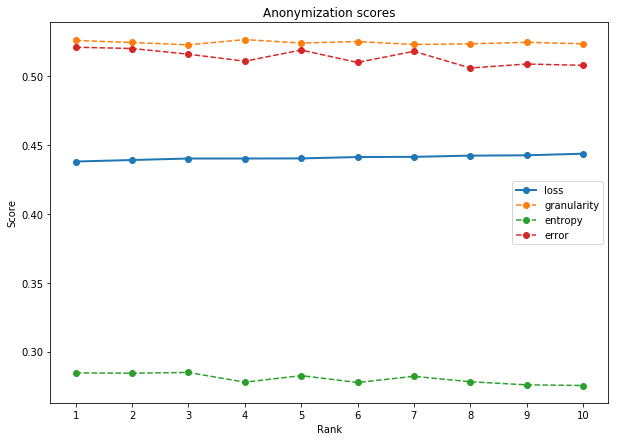

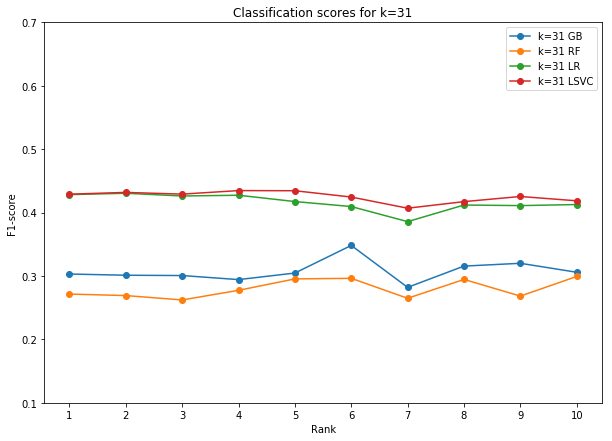

In [170]:
plt.figure(figsize=(10,7))
plt.xlabel('Rank')
plt.ylabel('Score')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], scores_k_31['loss'].tolist(), marker='o', label="loss", linewidth=2)
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], scores_k_31['granularity'].tolist(), marker='o', label="granularity", linestyle='--')
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], scores_k_31['entropy'].tolist(), marker='o', label="entropy", linestyle='--')
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], scores_k_31['error'].tolist(), marker='o', label="error", linestyle='--')
plt.title("Anonymization scores")
plt.legend()
plt.show()

plt.figure(figsize=(10,7))
plt.xlabel('Rank')
plt.ylabel('F1-score')
if target == 'marital-status':    
    axes = plt.gca()
    axes.set_ylim([0.5,1.0])
elif target == 'education-num':
    axes = plt.gca()
    axes.set_ylim([0.1,0.7])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_GB[3], marker='o', label="k=31 GB")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_RF[3], marker='o', label="k=31 RF")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_LR[3], marker='o', label="k=31 LR")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_LSVC[3], marker='o', label="k=31 LSVC")
plt.title("Classification scores for k=31")
plt.legend()
plt.show()

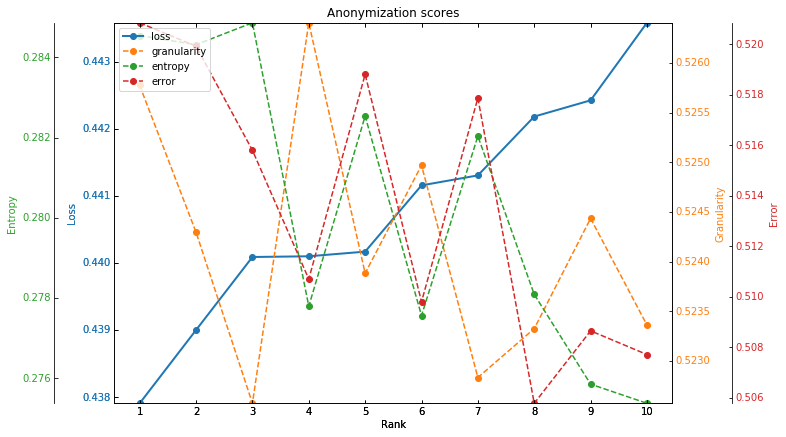

In [171]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

plt.figure(figsize=(10,7))

host = host_subplot(111, axes_class=AA.Axes)
par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()

new_fixed_axis1 = par1.get_grid_helper().new_fixed_axis
par1.axis["right"] = new_fixed_axis1(loc="right",
                                    axes=par1,
                                    offset=(0, 0))

new_fixed_axis2 = par2.get_grid_helper().new_fixed_axis
par2.axis["left"] = new_fixed_axis2(loc="left",
                                    axes=par2,
                                    offset=(-60, 0))

new_fixed_axis3 = par3.get_grid_helper().new_fixed_axis
par3.axis["right"] = new_fixed_axis3(loc="right",
                                    axes=par3,
                                    offset=(60, 0))

par2.axis["right"].toggle(all=False)

plt.xlabel('Rank')

host.set_ylabel("Loss")
par1.set_ylabel("Granularity")
par2.set_ylabel("Entropy")
par3.set_ylabel("Error")

plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
p1, = host.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], scores_k_31['loss'].tolist(), marker='o', label="loss", linewidth=2)
p2, = par1.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], scores_k_31['granularity'].tolist(), marker='o', label="granularity", linestyle='--')
p3, = par2.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], scores_k_31['entropy'].tolist(), marker='o', label="entropy", linestyle='--')
p4, = par3.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], scores_k_31['error'].tolist(), marker='o', label="error", linestyle='--')

host.set_ylim(min(scores_k_31['loss'].tolist()), max(scores_k_31['loss'].tolist()))
par1.set_ylim(min(scores_k_31['granularity'].tolist()), max(scores_k_31['granularity'].tolist()))
par2.set_ylim(min(scores_k_31['entropy'].tolist()), max(scores_k_31['entropy'].tolist()))
par3.set_ylim(min(scores_k_31['error'].tolist()), max(scores_k_31['error'].tolist()))


host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["left"].label.set_color(p3.get_color())
par3.axis["right"].label.set_color(p4.get_color())

host.axis["left"].major_ticklabels.set_color(p1.get_color())
par1.axis["right"].major_ticklabels.set_color(p2.get_color())
par2.axis["left"].major_ticklabels.set_color(p3.get_color())
par3.axis["right"].major_ticklabels.set_color(p4.get_color())

plt.title("Anonymization scores")

plt.draw()
plt.show()

<b>Correlation</b>

In [172]:
print("GB: " + str(k_31_GB))
print("RF: " + str(k_31_RF))
print("LR: " + str(k_31_LR))
print("LSVC: " + str(k_31_LSVC))

GB: -0.2556304130932083
RF: -0.4528253023612541
LR: 0.5828363133850509
LSVC: 0.5768097431171015


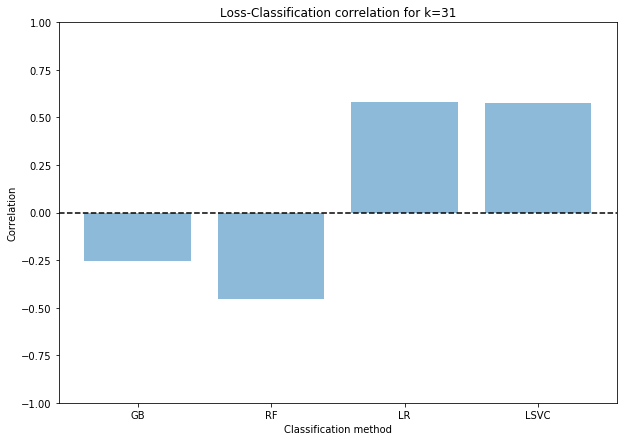

In [173]:
objects = ('GB', 'RF', 'LR', 'LSVC')
y_pos = np.arange(len(objects))
correlations = [k_31_GB, k_31_RF, k_31_LR, k_31_LSVC]

plt.figure(figsize=(10,7))
plt.axhline(0, color='k', linestyle='--')
plt.bar(y_pos, correlations, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
axes = plt.gca()
axes.set_ylim([-1,1])
plt.ylabel('Correlation')
plt.xlabel('Classification method')
plt.title('Loss-Classification correlation for k=31')

plt.show()

<h3>k=100</h3>

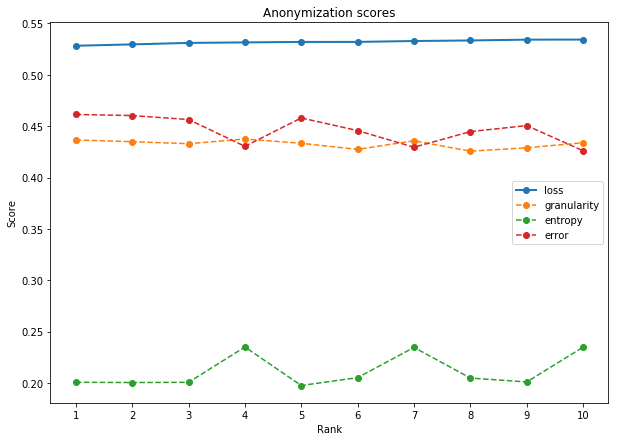

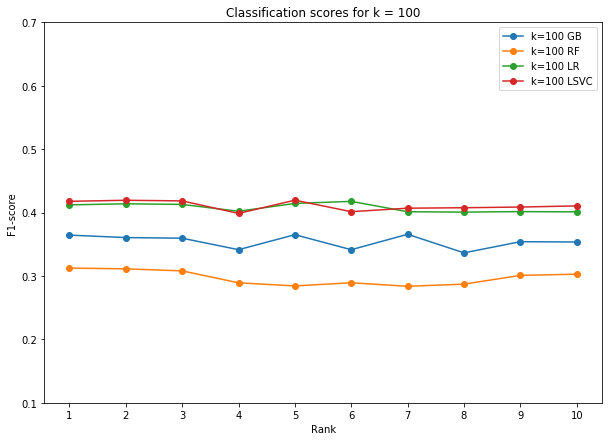

In [174]:
plt.figure(figsize=(10,7))
plt.xlabel('Rank')
plt.ylabel('Score')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], scores_k_100['loss'].tolist(), marker='o', label="loss", linewidth=2)
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], scores_k_100['granularity'].tolist(), marker='o', label="granularity", linestyle='--')
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], scores_k_100['entropy'].tolist(), marker='o', label="entropy", linestyle='--')
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], scores_k_100['error'].tolist(), marker='o', label="error", linestyle='--')
plt.title("Anonymization scores")
plt.legend()
plt.show()

plt.figure(figsize=(10,7))
plt.xlabel('Rank')
plt.ylabel('F1-score')
if target == 'marital-status':    
    axes = plt.gca()
    axes.set_ylim([0.5,1.0])
elif target == 'education-num':
    axes = plt.gca()
    axes.set_ylim([0.1,0.7])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_GB[4], marker='o', label="k=100 GB")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_RF[4], marker='o', label="k=100 RF")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_LR[4], marker='o', label="k=100 LR")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f1_scores_LSVC[4], marker='o', label="k=100 LSVC")
plt.title("Classification scores for k = 100")
plt.legend()
plt.show()

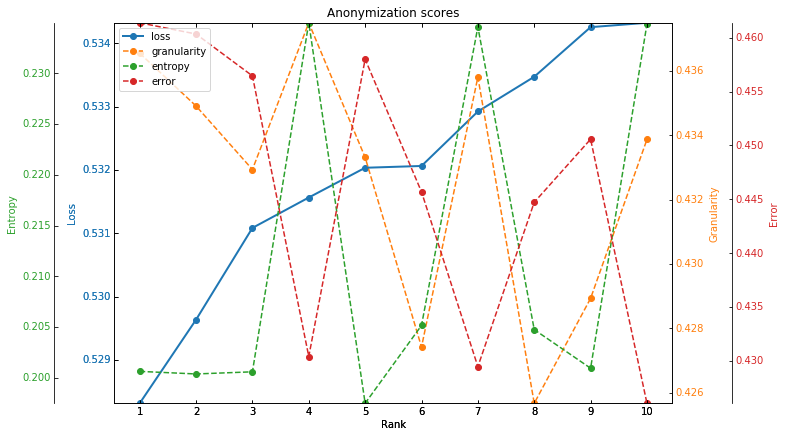

In [175]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

plt.figure(figsize=(10,7))

host = host_subplot(111, axes_class=AA.Axes)
par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()

new_fixed_axis1 = par1.get_grid_helper().new_fixed_axis
par1.axis["right"] = new_fixed_axis1(loc="right",
                                    axes=par1,
                                    offset=(0, 0))

new_fixed_axis2 = par2.get_grid_helper().new_fixed_axis
par2.axis["left"] = new_fixed_axis2(loc="left",
                                    axes=par2,
                                    offset=(-60, 0))

new_fixed_axis3 = par3.get_grid_helper().new_fixed_axis
par3.axis["right"] = new_fixed_axis3(loc="right",
                                    axes=par3,
                                    offset=(60, 0))

par2.axis["right"].toggle(all=False)

plt.xlabel('Rank')

host.set_ylabel("Loss")
par1.set_ylabel("Granularity")
par2.set_ylabel("Entropy")
par3.set_ylabel("Error")

plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
p1, = host.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], scores_k_100['loss'].tolist(), marker='o', label="loss", linewidth=2)
p2, = par1.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], scores_k_100['granularity'].tolist(), marker='o', label="granularity", linestyle='--')
p3, = par2.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], scores_k_100['entropy'].tolist(), marker='o', label="entropy", linestyle='--')
p4, = par3.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], scores_k_100['error'].tolist(), marker='o', label="error", linestyle='--')

host.set_ylim(min(scores_k_100['loss'].tolist()), max(scores_k_100['loss'].tolist()))
par1.set_ylim(min(scores_k_100['granularity'].tolist()), max(scores_k_100['granularity'].tolist()))
par2.set_ylim(min(scores_k_100['entropy'].tolist()), max(scores_k_100['entropy'].tolist()))
par3.set_ylim(min(scores_k_100['error'].tolist()), max(scores_k_100['error'].tolist()))


host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["left"].label.set_color(p3.get_color())
par3.axis["right"].label.set_color(p4.get_color())

host.axis["left"].major_ticklabels.set_color(p1.get_color())
par1.axis["right"].major_ticklabels.set_color(p2.get_color())
par2.axis["left"].major_ticklabels.set_color(p3.get_color())
par3.axis["right"].major_ticklabels.set_color(p4.get_color())

plt.title("Anonymization scores")

plt.draw()
plt.show()

<b>Correlation</b>

In [176]:
print("GB: " + str(k_100_GB))
print("RF: " + str(k_100_RF))
print("LR: " + str(k_100_LR))
print("LSVC: " + str(k_100_LSVC))

GB: 0.3680826332154992
RF: 0.5179709244847819
LR: 0.6447608962806786
LSVC: 0.46406927274457077


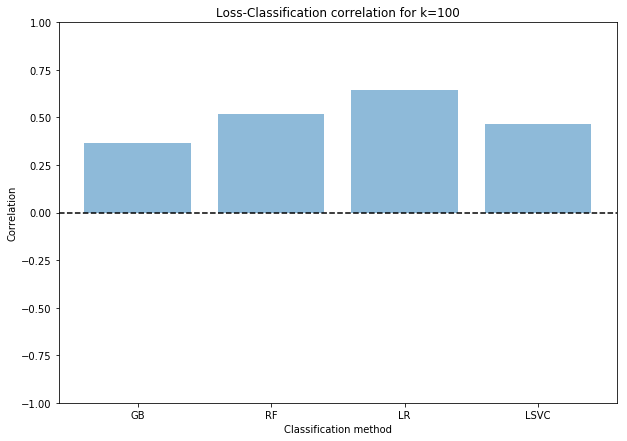

In [177]:
objects = ('GB', 'RF', 'LR', 'LSVC')
y_pos = np.arange(len(objects))
correlations = [k_100_GB, k_100_RF, k_100_LR, k_100_LSVC]

plt.figure(figsize=(10,7))
plt.axhline(0, color='k', linestyle='--')
plt.bar(y_pos, correlations, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
axes = plt.gca()
axes.set_ylim([-1,1])
plt.ylabel('Correlation')
plt.xlabel('Classification method')
plt.title('Loss-Classification correlation for k=100')

plt.show()

<h3>Gradient Boosting</h3>

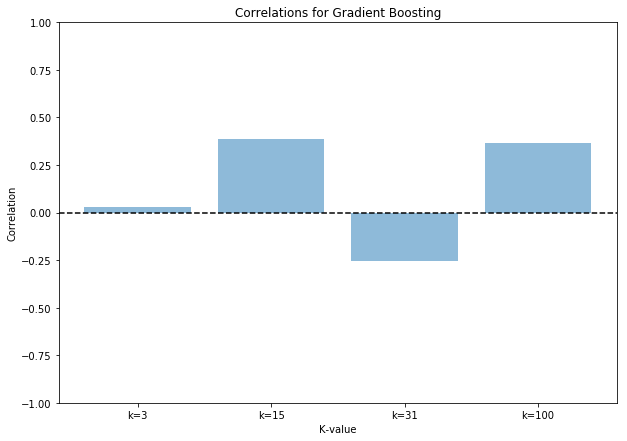

In [178]:
objects = ('k=3', 'k=15', 'k=31', 'k=100')
y_pos = np.arange(len(objects))
correlations = [k_3_GB, k_15_GB, k_31_GB, k_100_GB]

plt.figure(figsize=(10,7))
plt.axhline(0, color='k', linestyle='--')
plt.bar(y_pos, correlations, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
axes = plt.gca()
axes.set_ylim([-1,1])
plt.ylabel('Correlation')
plt.xlabel('K-value')
plt.title('Correlations for Gradient Boosting')

plt.show()

<h3>Random Forest</h3>

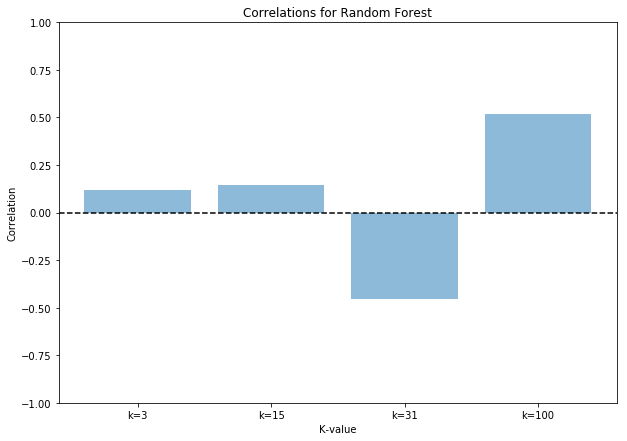

In [179]:
objects = ('k=3', 'k=15', 'k=31', 'k=100')
y_pos = np.arange(len(objects))
correlations = [k_3_RF, k_15_RF, k_31_RF, k_100_RF]

plt.figure(figsize=(10,7))
plt.axhline(0, color='k', linestyle='--')
plt.bar(y_pos, correlations, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
axes = plt.gca()
axes.set_ylim([-1,1])
plt.ylabel('Correlation')
plt.xlabel('K-value')
plt.title('Correlations for Random Forest')

plt.show()

<h3>Logistic Regression</h3>

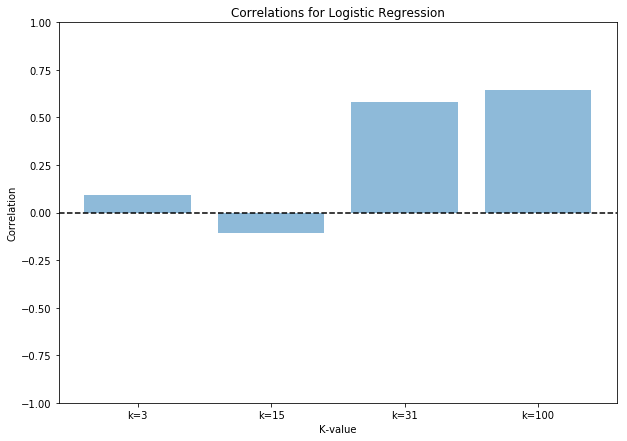

In [180]:
objects = ('k=3', 'k=15', 'k=31', 'k=100')
y_pos = np.arange(len(objects))
correlations = [k_3_LR, k_15_LR, k_31_LR, k_100_LR]

plt.figure(figsize=(10,7))
plt.axhline(0, color='k', linestyle='--')
plt.bar(y_pos, correlations, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
axes = plt.gca()
axes.set_ylim([-1,1])
plt.ylabel('Correlation')
plt.xlabel('K-value')
plt.title('Correlations for Logistic Regression')

plt.show()

<h3>Linear SVC</h3>

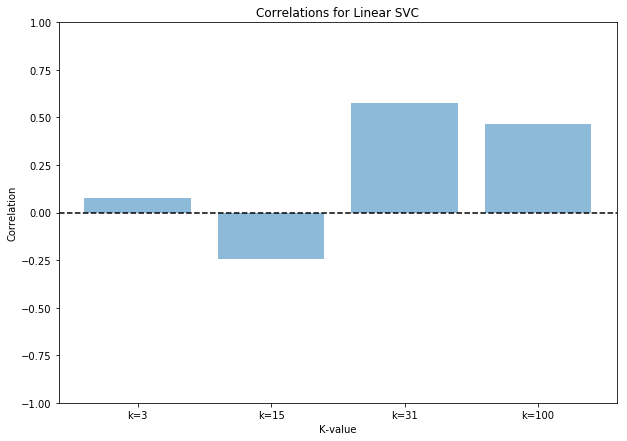

In [181]:
objects = ('k=3', 'k=15', 'k=31', 'k=100')
y_pos = np.arange(len(objects))
correlations = [k_3_LSVC, k_15_LSVC, k_31_LSVC, k_100_LSVC]

plt.figure(figsize=(10,7))
plt.axhline(0, color='k', linestyle='--')
plt.bar(y_pos, correlations, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
axes = plt.gca()
axes.set_ylim([-1,1])
plt.ylabel('Correlation')
plt.xlabel('K-value')
plt.title('Correlations for Linear SVC')

plt.show()

<h2>Fingerprinting</h2>

<h3>Correlation</h3>

In [182]:
# LOSS

k_3_GB_finger = np.corrcoef(f1_scores_GB_finger[0], scores_k_3_finger['loss'].tolist())[0, 1] * -1
k_15_GB_finger = np.corrcoef(f1_scores_GB_finger[1], scores_k_15_finger['loss'].tolist())[0, 1] * -1
k_31_GB_finger = np.corrcoef(f1_scores_GB_finger[2], scores_k_31_finger['loss'].tolist())[0, 1] * -1
k_100_GB_finger = np.corrcoef(f1_scores_GB_finger[3], scores_k_100_finger['loss'].tolist())[0, 1] * -1

k_3_RF_finger = np.corrcoef(f1_scores_RF_finger[0], scores_k_3_finger['loss'].tolist())[0, 1] * -1
k_15_RF_finger = np.corrcoef(f1_scores_RF_finger[1], scores_k_15_finger['loss'].tolist())[0, 1] * -1
k_31_RF_finger = np.corrcoef(f1_scores_RF_finger[2], scores_k_31_finger['loss'].tolist())[0, 1] * -1
k_100_RF_finger = np.corrcoef(f1_scores_RF_finger[3], scores_k_100_finger['loss'].tolist())[0, 1] * -1

k_3_LR_finger = np.corrcoef(f1_scores_LR_finger[0], scores_k_3_finger['loss'].tolist())[0, 1] * -1
k_15_LR_finger = np.corrcoef(f1_scores_LR_finger[1], scores_k_15_finger['loss'].tolist())[0, 1] * -1
k_31_LR_finger = np.corrcoef(f1_scores_LR_finger[2], scores_k_31_finger['loss'].tolist())[0, 1] * -1
k_100_LR_finger = np.corrcoef(f1_scores_LR_finger[3], scores_k_100_finger['loss'].tolist())[0, 1] * -1

k_3_LSVC_finger = np.corrcoef(f1_scores_LSVC_finger[0], scores_k_3_finger['loss'].tolist())[0, 1] * -1
k_15_LSVC_finger = np.corrcoef(f1_scores_LSVC_finger[1], scores_k_15_finger['loss'].tolist())[0, 1] * -1
k_31_LSVC_finger = np.corrcoef(f1_scores_LSVC_finger[2], scores_k_31_finger['loss'].tolist())[0, 1] * -1
k_100_LSVC_finger = np.corrcoef(f1_scores_LSVC_finger[3], scores_k_100_finger['loss'].tolist())[0, 1] * -1

In [183]:
# GRANULARITY

k_3_GB_granularity_finger = np.corrcoef(f1_scores_GB_finger[0], scores_k_3_finger['granularity'].tolist())[0, 1]
k_15_GB_granularity_finger = np.corrcoef(f1_scores_GB_finger[1], scores_k_15_finger['granularity'].tolist())[0, 1]
k_31_GB_granularity_finger = np.corrcoef(f1_scores_GB_finger[2], scores_k_31_finger['granularity'].tolist())[0, 1]
k_100_GB_granularity_finger = np.corrcoef(f1_scores_GB_finger[3], scores_k_100_finger['granularity'].tolist())[0, 1]

k_3_RF_granularity_finger = np.corrcoef(f1_scores_RF_finger[0], scores_k_3_finger['granularity'].tolist())[0, 1]
k_15_RF_granularity_finger = np.corrcoef(f1_scores_RF_finger[1], scores_k_15_finger['granularity'].tolist())[0, 1]
k_31_RF_granularity_finger = np.corrcoef(f1_scores_RF_finger[2], scores_k_31_finger['granularity'].tolist())[0, 1]
k_100_RF_granularity_finger = np.corrcoef(f1_scores_RF_finger[3], scores_k_100_finger['granularity'].tolist())[0, 1]

k_3_LR_granularity_finger = np.corrcoef(f1_scores_LR_finger[0], scores_k_3_finger['granularity'].tolist())[0, 1]
k_15_LR_granularity_finger = np.corrcoef(f1_scores_LR_finger[1], scores_k_15_finger['granularity'].tolist())[0, 1]
k_31_LR_granularity_finger = np.corrcoef(f1_scores_LR_finger[2], scores_k_31_finger['granularity'].tolist())[0, 1]
k_100_LR_granularity_finger = np.corrcoef(f1_scores_LR_finger[3], scores_k_100_finger['granularity'].tolist())[0, 1]

k_3_LSVC_granularity_finger = np.corrcoef(f1_scores_LSVC_finger[0], scores_k_3_finger['granularity'].tolist())[0, 1]
k_15_LSVC_granularity_finger = np.corrcoef(f1_scores_LSVC_finger[1], scores_k_15_finger['granularity'].tolist())[0, 1]
k_31_LSVC_granularity_finger = np.corrcoef(f1_scores_LSVC_finger[2], scores_k_31_finger['granularity'].tolist())[0, 1]
k_100_LSVC_granularity_finger = np.corrcoef(f1_scores_LSVC_finger[3], scores_k_100_finger['granularity'].tolist())[0, 1]

In [184]:
# ENTROPY

k_3_GB_entropy_finger = np.corrcoef(f1_scores_GB_finger[0], scores_k_3_finger['entropy'].tolist())[0, 1] * -1
k_15_GB_entropy_finger = np.corrcoef(f1_scores_GB_finger[1], scores_k_15_finger['entropy'].tolist())[0, 1] * -1
k_31_GB_entropy_finger = np.corrcoef(f1_scores_GB_finger[2], scores_k_31_finger['entropy'].tolist())[0, 1] * -1
k_100_GB_entropy_finger = np.corrcoef(f1_scores_GB_finger[3], scores_k_100_finger['entropy'].tolist())[0, 1] * -1

k_3_RF_entropy_finger = np.corrcoef(f1_scores_RF_finger[0], scores_k_3_finger['entropy'].tolist())[0, 1] * -1
k_15_RF_entropy_finger = np.corrcoef(f1_scores_RF_finger[1], scores_k_15_finger['entropy'].tolist())[0, 1] * -1
k_31_RF_entropy_finger = np.corrcoef(f1_scores_RF_finger[2], scores_k_31_finger['entropy'].tolist())[0, 1] * -1
k_100_RF_entropy_finger = np.corrcoef(f1_scores_RF_finger[3], scores_k_100_finger['entropy'].tolist())[0, 1] * -1

k_3_LR_entropy_finger = np.corrcoef(f1_scores_LR_finger[0], scores_k_3_finger['entropy'].tolist())[0, 1] * -1
k_15_LR_entropy_finger = np.corrcoef(f1_scores_LR_finger[1], scores_k_15_finger['entropy'].tolist())[0, 1] * -1
k_31_LR_entropy_finger = np.corrcoef(f1_scores_LR_finger[2], scores_k_31_finger['entropy'].tolist())[0, 1] * -1
k_100_LR_entropy_finger = np.corrcoef(f1_scores_LR_finger[3], scores_k_100_finger['entropy'].tolist())[0, 1] * -1

k_3_LSVC_entropy_finger = np.corrcoef(f1_scores_LSVC_finger[0], scores_k_3_finger['entropy'].tolist())[0, 1] * -1
k_15_LSVC_entropy_finger = np.corrcoef(f1_scores_LSVC_finger[1], scores_k_15_finger['entropy'].tolist())[0, 1] * -1
k_31_LSVC_entropy_finger = np.corrcoef(f1_scores_LSVC_finger[2], scores_k_31_finger['entropy'].tolist())[0, 1] * -1
k_100_LSVC_entropy_finger = np.corrcoef(f1_scores_LSVC_finger[3], scores_k_100_finger['entropy'].tolist())[0, 1] * -1

In [185]:
# ERROR

k_3_GB_error_finger = np.corrcoef(f1_scores_GB_finger[0], scores_k_3_finger['error'].tolist())[0, 1] * -1
k_15_GB_error_finger = np.corrcoef(f1_scores_GB_finger[1], scores_k_15_finger['error'].tolist())[0, 1] * -1
k_31_GB_error_finger = np.corrcoef(f1_scores_GB_finger[2], scores_k_31_finger['error'].tolist())[0, 1] * -1
k_100_GB_error_finger = np.corrcoef(f1_scores_GB_finger[3], scores_k_100_finger['error'].tolist())[0, 1] * -1

k_3_RF_error_finger = np.corrcoef(f1_scores_RF_finger[0], scores_k_3_finger['error'].tolist())[0, 1] * -1
k_15_RF_error_finger = np.corrcoef(f1_scores_RF_finger[1], scores_k_15_finger['error'].tolist())[0, 1] * -1
k_31_RF_error_finger = np.corrcoef(f1_scores_RF_finger[2], scores_k_31_finger['error'].tolist())[0, 1] * -1
k_100_RF_error_finger = np.corrcoef(f1_scores_RF_finger[3], scores_k_100_finger['error'].tolist())[0, 1] * -1

k_3_LR_error_finger = np.corrcoef(f1_scores_LR_finger[0], scores_k_3_finger['error'].tolist())[0, 1] * -1
k_15_LR_error_finger = np.corrcoef(f1_scores_LR_finger[1], scores_k_15_finger['error'].tolist())[0, 1] * -1
k_31_LR_error_finger = np.corrcoef(f1_scores_LR_finger[2], scores_k_31_finger['error'].tolist())[0, 1] * -1
k_100_LR_error_finger = np.corrcoef(f1_scores_LR_finger[3], scores_k_100_finger['error'].tolist())[0, 1] * -1

k_3_LSVC_error_finger = np.corrcoef(f1_scores_LSVC_finger[0], scores_k_3_finger['error'].tolist())[0, 1] * -1
k_15_LSVC_error_finger = np.corrcoef(f1_scores_LSVC_finger[1], scores_k_15_finger['error'].tolist())[0, 1] * -1
k_31_LSVC_error_finger = np.corrcoef(f1_scores_LSVC_finger[2], scores_k_31_finger['error'].tolist())[0, 1] * -1
k_100_LSVC_error_finger = np.corrcoef(f1_scores_LSVC_finger[3], scores_k_100_finger['error'].tolist())[0, 1] * -1

<h3>Gradient Boosting</h3>

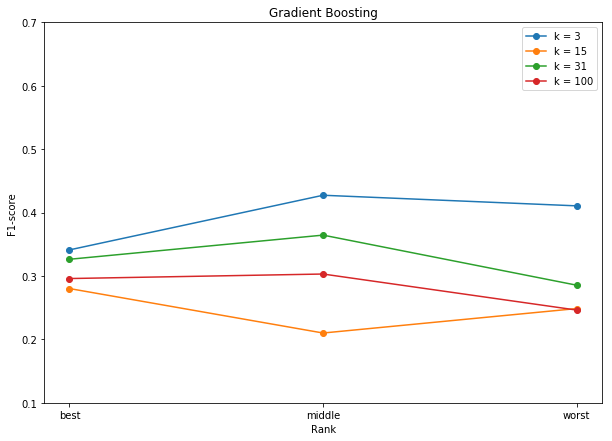

In [186]:
plt.figure(figsize=(10,7))
plt.xlabel('Rank')
plt.ylabel('F1-score')
if target == 'marital-status':    
    axes = plt.gca()
    axes.set_ylim([0.5,1.0])
elif target == 'education-num':
    axes = plt.gca()
    axes.set_ylim([0.1,0.7])
plt.plot(["best", "middle", "worst"], f1_scores_GB_finger[0], marker='o', label="k = 3")
plt.plot(["best", "middle", "worst"], f1_scores_GB_finger[1], marker='o', label="k = 15")
plt.plot(["best", "middle", "worst"], f1_scores_GB_finger[2], marker='o', label="k = 31")
plt.plot(["best", "middle", "worst"], f1_scores_GB_finger[3], marker='o', label="k = 100")
plt.title("Gradient Boosting")
plt.legend()
plt.show()

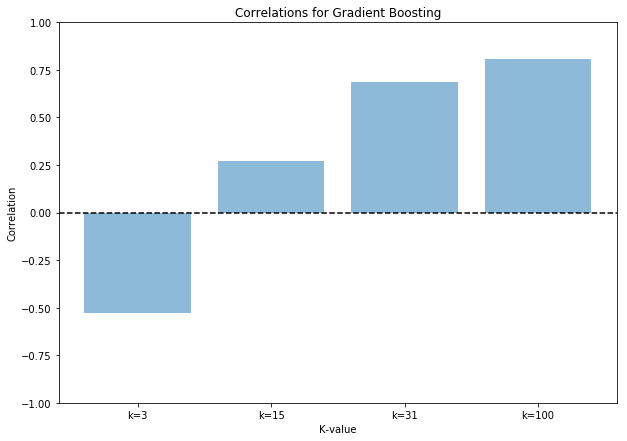

In [187]:
objects = ('k=3', 'k=15', 'k=31', 'k=100')
y_pos = np.arange(len(objects))
correlations = [k_3_GB_finger, k_15_GB_finger, k_31_GB_finger, k_100_GB_finger]

plt.figure(figsize=(10,7))
plt.axhline(0, color='k', linestyle='--')
plt.bar(y_pos, correlations, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
axes = plt.gca()
axes.set_ylim([-1,1])
plt.ylabel('Correlation')
plt.xlabel('K-value')
plt.title('Correlations for Gradient Boosting')

plt.show()

<h3>Random Forest</h3>

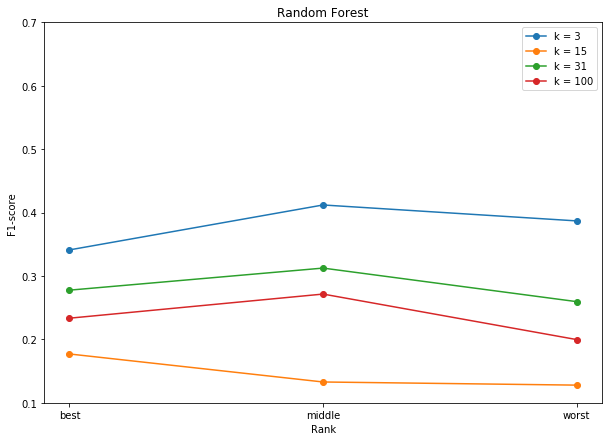

In [188]:
plt.figure(figsize=(10,7))
plt.xlabel('Rank')
plt.ylabel('F1-score')
if target == 'marital-status':    
    axes = plt.gca()
    axes.set_ylim([0.5,1.0])
elif target == 'education-num':
    axes = plt.gca()
    axes.set_ylim([0.1,0.7])
plt.plot(["best", "middle", "worst"], f1_scores_RF_finger[0], marker='o', label="k = 3")
plt.plot(["best", "middle", "worst"], f1_scores_RF_finger[1], marker='o', label="k = 15")
plt.plot(["best", "middle", "worst"], f1_scores_RF_finger[2], marker='o', label="k = 31")
plt.plot(["best", "middle", "worst"], f1_scores_RF_finger[3], marker='o', label="k = 100")
plt.title("Random Forest")
plt.legend()
plt.show()

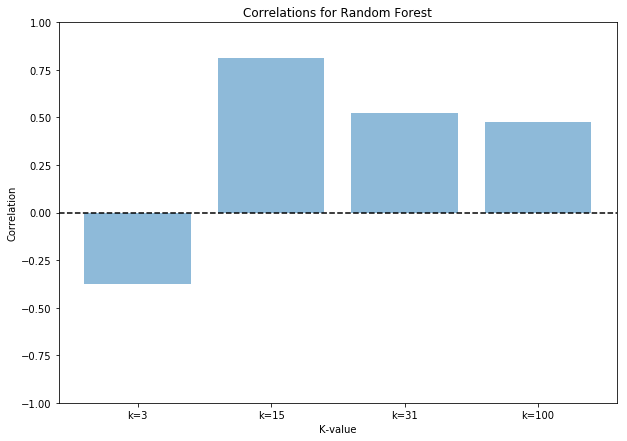

In [189]:
objects = ('k=3', 'k=15', 'k=31', 'k=100')
y_pos = np.arange(len(objects))
correlations = [k_3_RF_finger, k_15_RF_finger, k_31_RF_finger, k_100_RF_finger]

plt.figure(figsize=(10,7))
plt.axhline(0, color='k', linestyle='--')
plt.bar(y_pos, correlations, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
axes = plt.gca()
axes.set_ylim([-1,1])
plt.ylabel('Correlation')
plt.xlabel('K-value')
plt.title('Correlations for Random Forest')

plt.show()

<h3>Logistic Regression</h3>

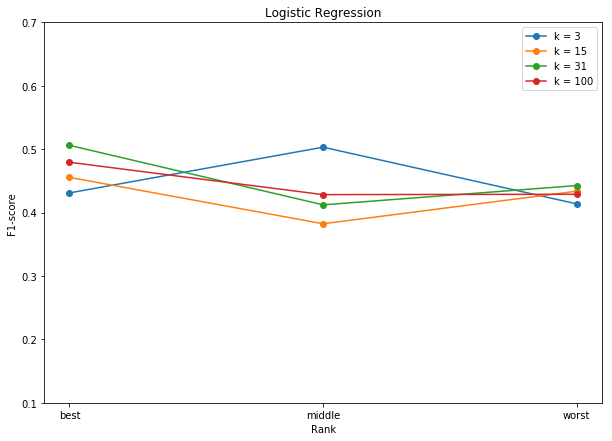

In [190]:
plt.figure(figsize=(10,7))
plt.xlabel('Rank')
plt.ylabel('F1-score')
if target == 'marital-status':    
    axes = plt.gca()
    axes.set_ylim([0.5,1.0])
elif target == 'education-num':
    axes = plt.gca()
    axes.set_ylim([0.1,0.7])
plt.plot(["best", "middle", "worst"], f1_scores_LR_finger[0], marker='o', label="k = 3")
plt.plot(["best", "middle", "worst"], f1_scores_LR_finger[1], marker='o', label="k = 15")
plt.plot(["best", "middle", "worst"], f1_scores_LR_finger[2], marker='o', label="k = 31")
plt.plot(["best", "middle", "worst"], f1_scores_LR_finger[3], marker='o', label="k = 100")
plt.title("Logistic Regression")
plt.legend()
plt.show()

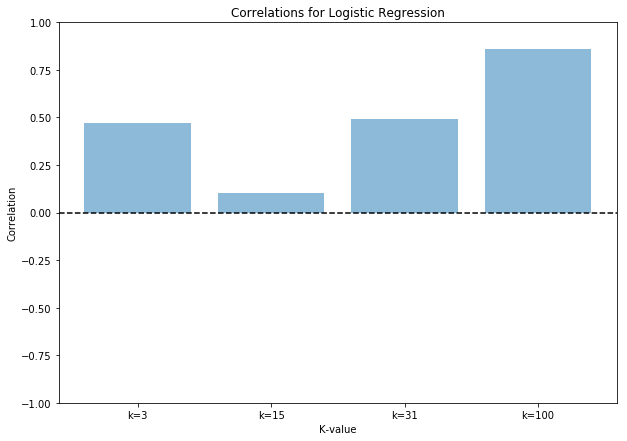

In [191]:
objects = ('k=3', 'k=15', 'k=31', 'k=100')
y_pos = np.arange(len(objects))
correlations = [k_3_LR_finger, k_15_LR_finger, k_31_LR_finger, k_100_LR_finger]

plt.figure(figsize=(10,7))
plt.axhline(0, color='k', linestyle='--')
plt.bar(y_pos, correlations, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
axes = plt.gca()
axes.set_ylim([-1,1])
plt.ylabel('Correlation')
plt.xlabel('K-value')
plt.title('Correlations for Logistic Regression')

plt.show()

<h3>Linear SVC</h3>

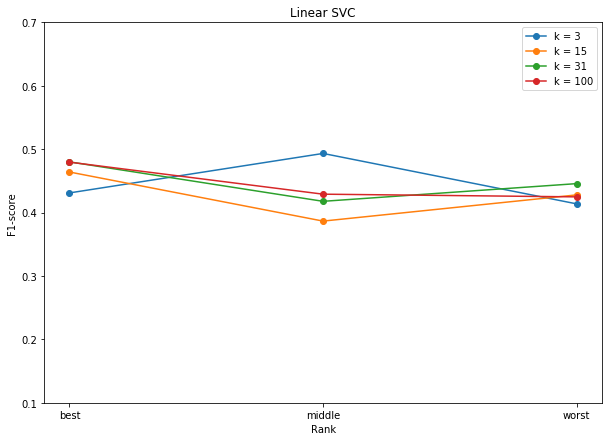

In [192]:
plt.figure(figsize=(10,7))
plt.xlabel('Rank')
plt.ylabel('F1-score')
if target == 'marital-status':    
    axes = plt.gca()
    axes.set_ylim([0.5,1.0])
elif target == 'education-num':
    axes = plt.gca()
    axes.set_ylim([0.1,0.7])
plt.plot(["best", "middle", "worst"], f1_scores_LSVC_finger[0], marker='o', label="k = 3")
plt.plot(["best", "middle", "worst"], f1_scores_LSVC_finger[1], marker='o', label="k = 15")
plt.plot(["best", "middle", "worst"], f1_scores_LSVC_finger[2], marker='o', label="k = 31")
plt.plot(["best", "middle", "worst"], f1_scores_LSVC_finger[3], marker='o', label="k = 100")
plt.title("Linear SVC")
plt.legend()
plt.show()

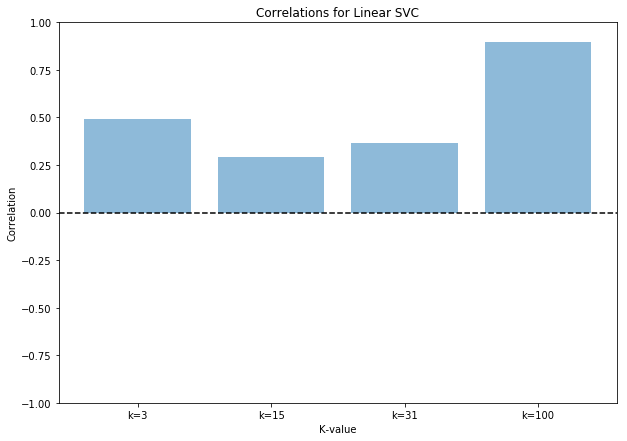

In [193]:
objects = ('k=3', 'k=15', 'k=31', 'k=100')
y_pos = np.arange(len(objects))
correlations = [k_3_LSVC_finger, k_15_LSVC_finger, k_31_LSVC_finger, k_100_LSVC_finger]

plt.figure(figsize=(10,7))
plt.axhline(0, color='k', linestyle='--')
plt.bar(y_pos, correlations, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
axes = plt.gca()
axes.set_ylim([-1,1])
plt.ylabel('Correlation')
plt.xlabel('K-value')
plt.title('Correlations for Linear SVC')

plt.show()

<h3>k=3</h3>

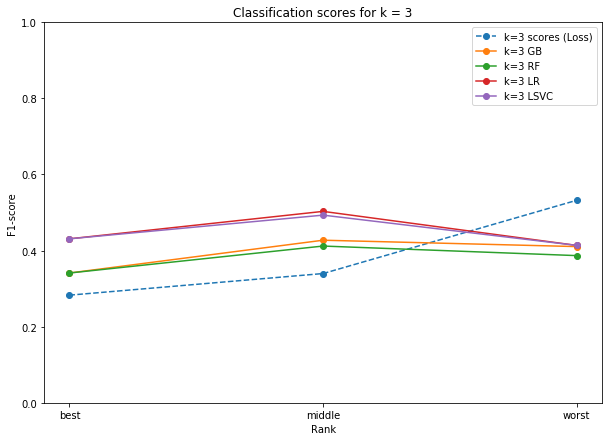

In [194]:
plt.figure(figsize=(10,7))
plt.xlabel('Rank')
plt.ylabel('F1-score')
axes = plt.gca()
axes.set_ylim([0.0,1.0])
plt.plot(["best", "middle", "worst"], scores_k_3_finger['loss'].tolist(), linestyle='--', marker='o', label="k=3 scores (Loss)")
plt.plot(["best", "middle", "worst"], f1_scores_GB_finger[0], marker='o', label="k=3 GB")
plt.plot(["best", "middle", "worst"], f1_scores_RF_finger[0], marker='o', label="k=3 RF")
plt.plot(["best", "middle", "worst"], f1_scores_LR_finger[0], marker='o', label="k=3 LR")
plt.plot(["best", "middle", "worst"], f1_scores_LSVC_finger[0], marker='o', label="k=3 LSVC")
plt.title("Classification scores for k = 3")
plt.legend()
plt.show()

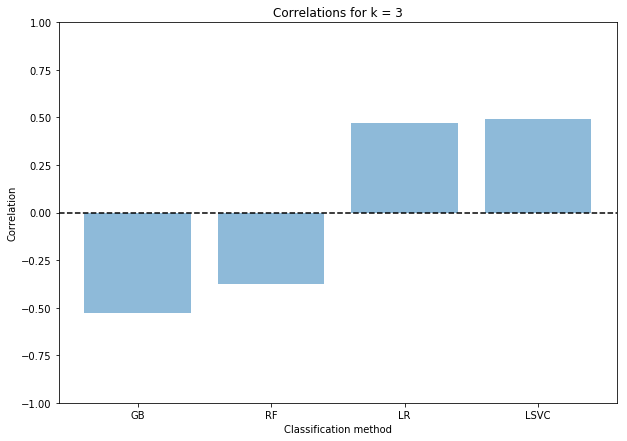

In [195]:
objects = ('GB', 'RF', 'LR', 'LSVC')
y_pos = np.arange(len(objects))
correlations = [k_3_GB_finger, k_3_RF_finger, k_3_LR_finger, k_3_LSVC_finger]

plt.figure(figsize=(10,7))
plt.axhline(0, color='k', linestyle='--')
plt.bar(y_pos, correlations, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
axes = plt.gca()
axes.set_ylim([-1,1])
plt.ylabel('Correlation')
plt.xlabel('Classification method')
plt.title('Correlations for k = 3')

plt.show()

<h3>k=15</h3>

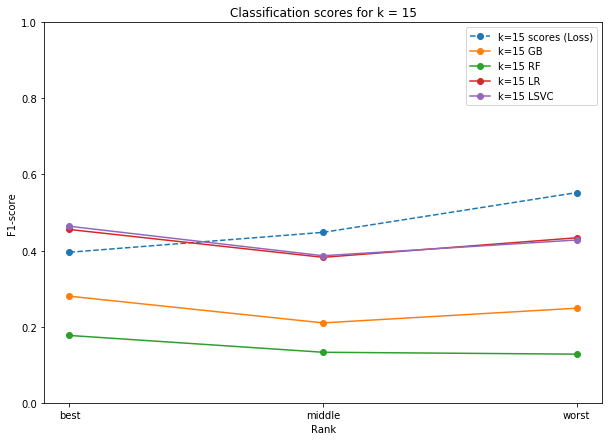

In [196]:
plt.figure(figsize=(10,7))
plt.xlabel('Rank')
plt.ylabel('F1-score')
axes = plt.gca()
axes.set_ylim([0.0,1.0])
plt.plot(["best", "middle", "worst"], scores_k_15_finger['loss'].tolist(), linestyle='--', marker='o', label="k=15 scores (Loss)")
plt.plot(["best", "middle", "worst"], f1_scores_GB_finger[1], marker='o', label="k=15 GB")
plt.plot(["best", "middle", "worst"], f1_scores_RF_finger[1], marker='o', label="k=15 RF")
plt.plot(["best", "middle", "worst"], f1_scores_LR_finger[1], marker='o', label="k=15 LR")
plt.plot(["best", "middle", "worst"], f1_scores_LSVC_finger[1], marker='o', label="k=15 LSVC")
plt.title("Classification scores for k = 15")
plt.legend()
plt.show()

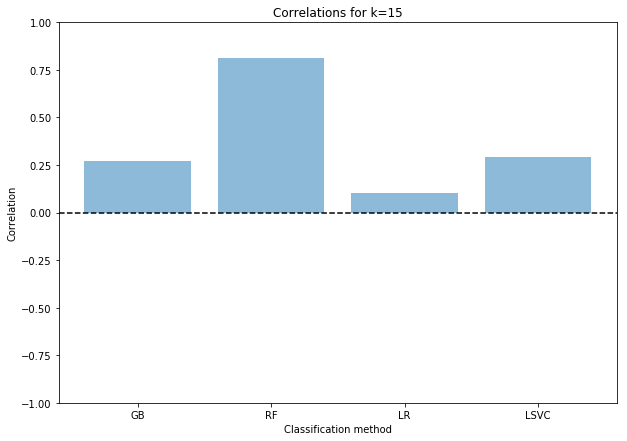

In [197]:
objects = ('GB', 'RF', 'LR', 'LSVC')
y_pos = np.arange(len(objects))
correlations = [k_15_GB_finger, k_15_RF_finger, k_15_LR_finger, k_15_LSVC_finger]

plt.figure(figsize=(10,7))
plt.axhline(0, color='k', linestyle='--')
plt.bar(y_pos, correlations, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
axes = plt.gca()
axes.set_ylim([-1,1])
plt.ylabel('Correlation')
plt.xlabel('Classification method')
plt.title('Correlations for k=15')

plt.show()

<h3>k=31</h3>

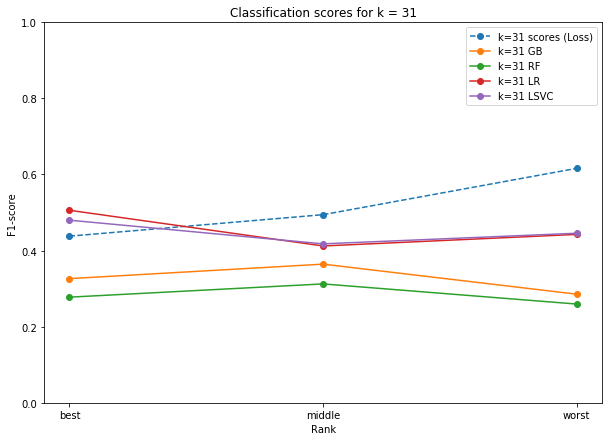

In [198]:
plt.figure(figsize=(10,7))
plt.xlabel('Rank')
plt.ylabel('F1-score')
axes = plt.gca()
axes.set_ylim([0.0,1.0])
plt.plot(["best", "middle", "worst"], scores_k_31_finger['loss'].tolist(), linestyle='--', marker='o', label="k=31 scores (Loss)")
plt.plot(["best", "middle", "worst"], f1_scores_GB_finger[2], marker='o', label="k=31 GB")
plt.plot(["best", "middle", "worst"], f1_scores_RF_finger[2], marker='o', label="k=31 RF")
plt.plot(["best", "middle", "worst"], f1_scores_LR_finger[2], marker='o', label="k=31 LR")
plt.plot(["best", "middle", "worst"], f1_scores_LSVC_finger[2], marker='o', label="k=31 LSVC")
plt.title("Classification scores for k = 31")
plt.legend()
plt.show()

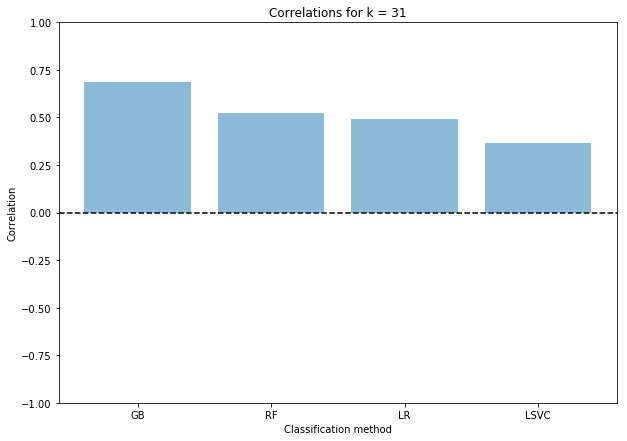

In [199]:
objects = ('GB', 'RF', 'LR', 'LSVC')
y_pos = np.arange(len(objects))
correlations = [k_31_GB_finger, k_31_RF_finger, k_31_LR_finger, k_31_LSVC_finger]

plt.figure(figsize=(10,7))
plt.axhline(0, color='k', linestyle='--')
plt.bar(y_pos, correlations, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
axes = plt.gca()
axes.set_ylim([-1,1])
plt.ylabel('Correlation')
plt.xlabel('Classification method')
plt.title('Correlations for k = 31')

plt.show()

<h3>k=100</h3>

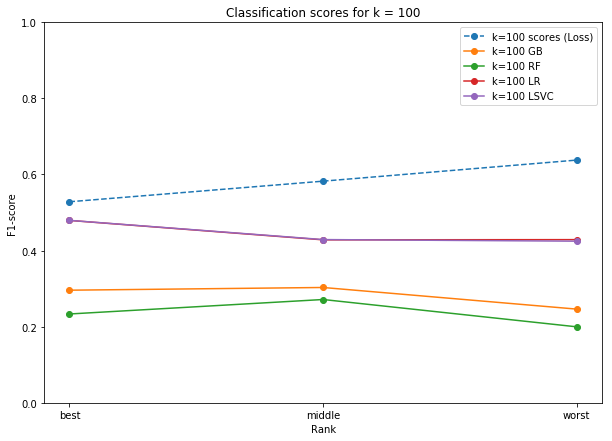

In [200]:
plt.figure(figsize=(10,7))
plt.xlabel('Rank')
plt.ylabel('F1-score')
axes = plt.gca()
axes.set_ylim([0.0,1.0])
plt.plot(["best", "middle", "worst"], scores_k_100_finger['loss'].tolist(), linestyle='--', marker='o', label="k=100 scores (Loss)")
plt.plot(["best", "middle", "worst"], f1_scores_GB_finger[3], marker='o', label="k=100 GB")
plt.plot(["best", "middle", "worst"], f1_scores_RF_finger[3], marker='o', label="k=100 RF")
plt.plot(["best", "middle", "worst"], f1_scores_LR_finger[3], marker='o', label="k=100 LR")
plt.plot(["best", "middle", "worst"], f1_scores_LSVC_finger[3], marker='o', label="k=100 LSVC")
plt.title("Classification scores for k = 100")
plt.legend()
plt.show()

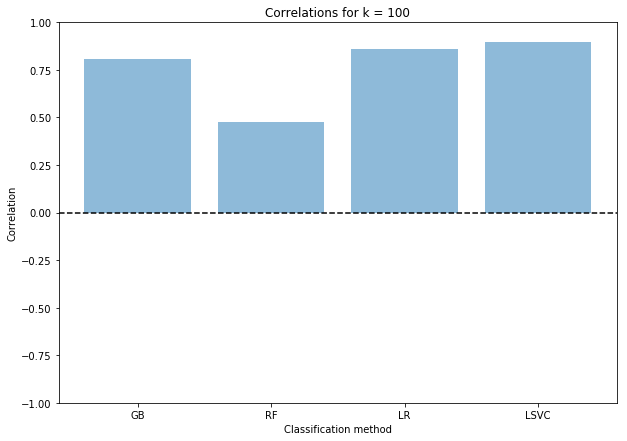

In [201]:
objects = ('GB', 'RF', 'LR', 'LSVC')
y_pos = np.arange(len(objects))
correlations = [k_100_GB_finger, k_100_RF_finger, k_100_LR_finger, k_100_LSVC_finger]

plt.figure(figsize=(10,7))
plt.axhline(0, color='k', linestyle='--')
plt.bar(y_pos, correlations, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
axes = plt.gca()
axes.set_ylim([-1,1])
plt.ylabel('Correlation')
plt.xlabel('Classification method')
plt.title('Correlations for k = 100')

plt.show()

<h3>Analysis of score correlations</h3>

<h4>Loss</h4>

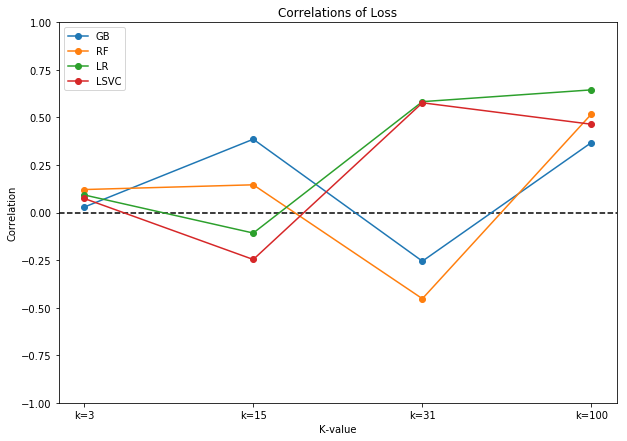

In [202]:
plt.figure(figsize=(10,7))
plt.xlabel('K-value')
plt.ylabel('Correlation')
axes = plt.gca()
axes.set_ylim([-1,1])
plt.axhline(0, color='k', linestyle='--')
plt.plot(['k=3', 'k=15', 'k=31', 'k=100'], [k_3_GB, k_15_GB, k_31_GB, k_100_GB], marker='o', label="GB")
plt.plot(['k=3', 'k=15', 'k=31', 'k=100'], [k_3_RF, k_15_RF, k_31_RF, k_100_RF], marker='o', label="RF")
plt.plot(['k=3', 'k=15', 'k=31', 'k=100'], [k_3_LR, k_15_LR, k_31_LR, k_100_LR], marker='o', label="LR")
plt.plot(['k=3', 'k=15', 'k=31', 'k=100'], [k_3_LSVC, k_15_LSVC, k_31_LSVC, k_100_LSVC], marker='o', label="LSVC")
plt.title("Correlations of Loss")
plt.legend()
plt.show()

<h4>Loss (finger)</h4>

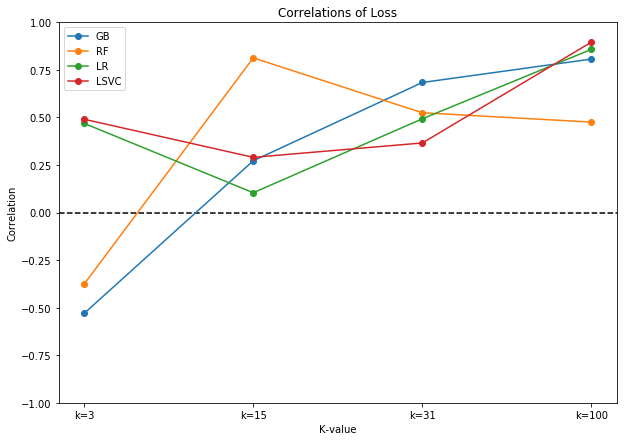

In [203]:
plt.figure(figsize=(10,7))
plt.xlabel('K-value')
plt.ylabel('Correlation')
axes = plt.gca()
axes.set_ylim([-1,1])
plt.axhline(0, color='k', linestyle='--')
plt.plot(['k=3', 'k=15', 'k=31', 'k=100'], [k_3_GB_finger, k_15_GB_finger, k_31_GB_finger, k_100_GB_finger], marker='o', label="GB")
plt.plot(['k=3', 'k=15', 'k=31', 'k=100'], [k_3_RF_finger, k_15_RF_finger, k_31_RF_finger, k_100_RF_finger], marker='o', label="RF")
plt.plot(['k=3', 'k=15', 'k=31', 'k=100'], [k_3_LR_finger, k_15_LR_finger, k_31_LR_finger, k_100_LR_finger], marker='o', label="LR")
plt.plot(['k=3', 'k=15', 'k=31', 'k=100'], [k_3_LSVC_finger, k_15_LSVC_finger, k_31_LSVC_finger, k_100_LSVC_finger], marker='o', label="LSVC")
plt.title("Correlations of Loss")
plt.legend()
plt.show()

<h4>Granularity</h4>

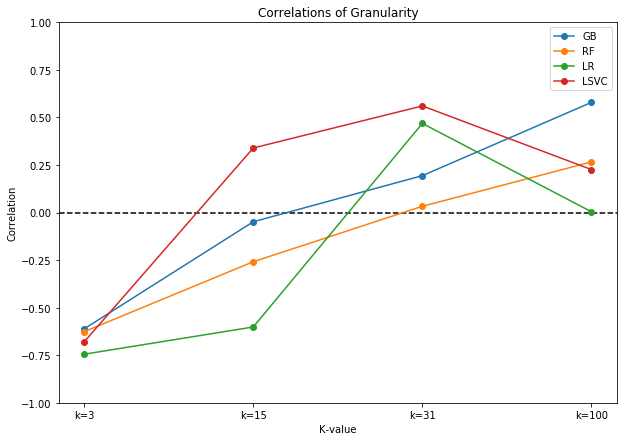

In [204]:
plt.figure(figsize=(10,7))
plt.xlabel('K-value')
plt.ylabel('Correlation')
axes = plt.gca()
axes.set_ylim([-1,1])
plt.axhline(0, color='k', linestyle='--')
plt.plot(['k=3', 'k=15', 'k=31', 'k=100'], [k_3_GB_granularity, k_15_GB_granularity, k_31_GB_granularity, k_100_GB_granularity], marker='o', label="GB")
plt.plot(['k=3', 'k=15', 'k=31', 'k=100'], [k_3_RF_granularity, k_15_RF_granularity, k_31_RF_granularity, k_100_RF_granularity], marker='o', label="RF")
plt.plot(['k=3', 'k=15', 'k=31', 'k=100'], [k_3_LR_granularity, k_15_LR_granularity, k_31_LR_granularity, k_100_LR_granularity], marker='o', label="LR")
plt.plot(['k=3', 'k=15', 'k=31', 'k=100'], [k_3_LSVC_granularity, k_15_LSVC_granularity, k_31_LSVC_granularity, k_100_LSVC_granularity], marker='o', label="LSVC")
plt.title("Correlations of Granularity")
plt.legend()
plt.show()

<h4>Granularity (finger)</h4>

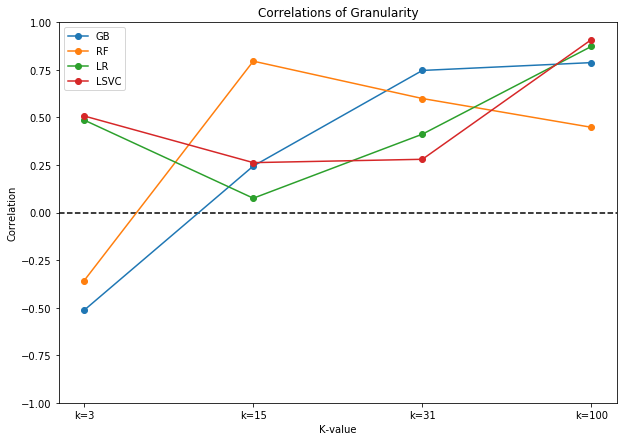

In [205]:
plt.figure(figsize=(10,7))
plt.xlabel('K-value')
plt.ylabel('Correlation')
axes = plt.gca()
axes.set_ylim([-1,1])
plt.axhline(0, color='k', linestyle='--')
plt.plot(['k=3', 'k=15', 'k=31', 'k=100'], [k_3_GB_granularity_finger, k_15_GB_granularity_finger, k_31_GB_granularity_finger, k_100_GB_granularity_finger], marker='o', label="GB")
plt.plot(['k=3', 'k=15', 'k=31', 'k=100'], [k_3_RF_granularity_finger, k_15_RF_granularity_finger, k_31_RF_granularity_finger, k_100_RF_granularity_finger], marker='o', label="RF")
plt.plot(['k=3', 'k=15', 'k=31', 'k=100'], [k_3_LR_granularity_finger, k_15_LR_granularity_finger, k_31_LR_granularity_finger, k_100_LR_granularity_finger], marker='o', label="LR")
plt.plot(['k=3', 'k=15', 'k=31', 'k=100'], [k_3_LSVC_granularity_finger, k_15_LSVC_granularity_finger, k_31_LSVC_granularity_finger, k_100_LSVC_granularity_finger], marker='o', label="LSVC")
plt.title("Correlations of Granularity")
plt.legend()
plt.show()

<h4>Entropy</h4>

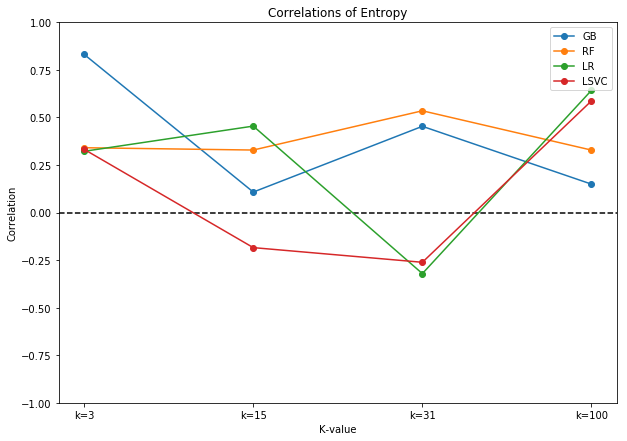

In [206]:
plt.figure(figsize=(10,7))
plt.xlabel('K-value')
plt.ylabel('Correlation')
axes = plt.gca()
axes.set_ylim([-1,1])
plt.axhline(0, color='k', linestyle='--')
plt.plot(['k=3', 'k=15', 'k=31', 'k=100'], [k_3_GB_entropy, k_15_GB_entropy, k_31_GB_entropy, k_100_GB_entropy], marker='o', label="GB")
plt.plot(['k=3', 'k=15', 'k=31', 'k=100'], [k_3_RF_entropy, k_15_RF_entropy, k_31_RF_entropy, k_100_RF_entropy], marker='o', label="RF")
plt.plot(['k=3', 'k=15', 'k=31', 'k=100'], [k_3_LR_entropy, k_15_LR_entropy, k_31_LR_entropy, k_100_LR_entropy], marker='o', label="LR")
plt.plot(['k=3', 'k=15', 'k=31', 'k=100'], [k_3_LSVC_entropy, k_15_LSVC_entropy, k_31_LSVC_entropy, k_100_LSVC_entropy], marker='o', label="LSVC")
plt.title("Correlations of Entropy")
plt.legend()
plt.show()

<h4>Entropy (finger)</h4>

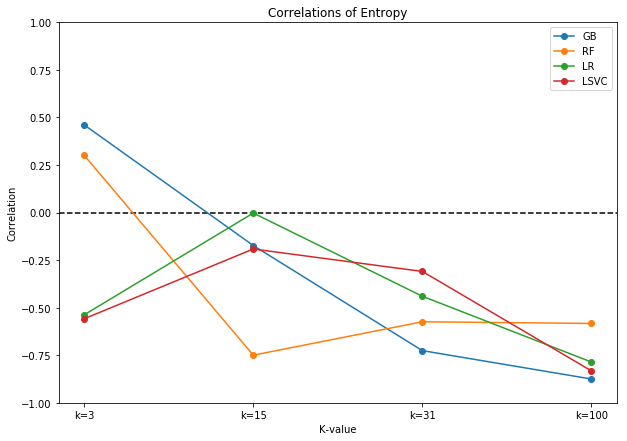

In [207]:
plt.figure(figsize=(10,7))
plt.xlabel('K-value')
plt.ylabel('Correlation')
axes = plt.gca()
axes.set_ylim([-1,1])
plt.axhline(0, color='k', linestyle='--')
plt.plot(['k=3', 'k=15', 'k=31', 'k=100'], [k_3_GB_entropy_finger, k_15_GB_entropy_finger, k_31_GB_entropy_finger, k_100_GB_entropy_finger], marker='o', label="GB")
plt.plot(['k=3', 'k=15', 'k=31', 'k=100'], [k_3_RF_entropy_finger, k_15_RF_entropy_finger, k_31_RF_entropy_finger, k_100_RF_entropy_finger], marker='o', label="RF")
plt.plot(['k=3', 'k=15', 'k=31', 'k=100'], [k_3_LR_entropy_finger, k_15_LR_entropy_finger, k_31_LR_entropy_finger, k_100_LR_entropy_finger], marker='o', label="LR")
plt.plot(['k=3', 'k=15', 'k=31', 'k=100'], [k_3_LSVC_entropy_finger, k_15_LSVC_entropy_finger, k_31_LSVC_entropy_finger, k_100_LSVC_entropy_finger], marker='o', label="LSVC")
plt.title("Correlations of Entropy")
plt.legend()
plt.show()

<h4>Error</h4>

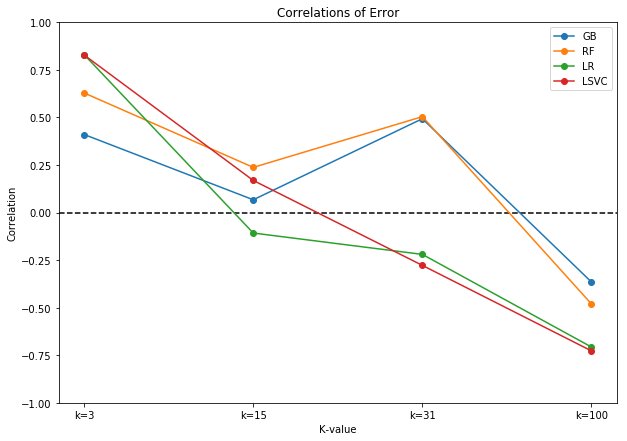

In [208]:
plt.figure(figsize=(10,7))
plt.xlabel('K-value')
axes = plt.gca()
axes.set_ylim([-1,1])
plt.ylabel('Correlation')
plt.axhline(0, color='k', linestyle='--')
plt.plot(['k=3', 'k=15', 'k=31', 'k=100'], [k_3_GB_error, k_15_GB_error, k_31_GB_error, k_100_GB_error], marker='o', label="GB")
plt.plot(['k=3', 'k=15', 'k=31', 'k=100'], [k_3_RF_error, k_15_RF_error, k_31_RF_error, k_100_RF_error], marker='o', label="RF")
plt.plot(['k=3', 'k=15', 'k=31', 'k=100'], [k_3_LR_error, k_15_LR_error, k_31_LR_error, k_100_LR_error], marker='o', label="LR")
plt.plot(['k=3', 'k=15', 'k=31', 'k=100'], [k_3_LSVC_error, k_15_LSVC_error, k_31_LSVC_error, k_100_LSVC_error], marker='o', label="LSVC")
plt.title("Correlations of Error")
plt.legend()
plt.show()

<h4>Error (finger)</h4>

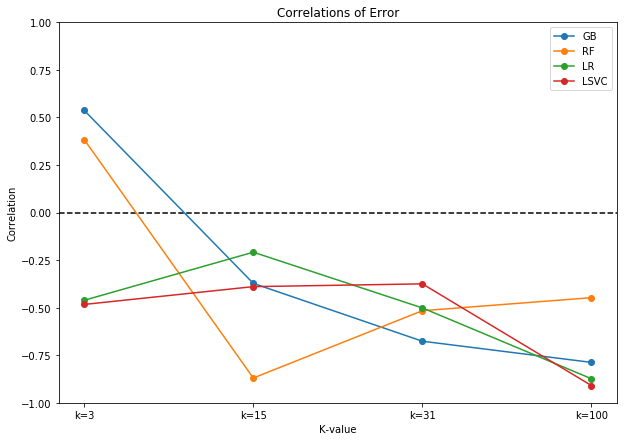

In [209]:
plt.figure(figsize=(10,7))
plt.xlabel('K-value')
axes = plt.gca()
axes.set_ylim([-1,1])
plt.ylabel('Correlation')
plt.axhline(0, color='k', linestyle='--')
plt.plot(['k=3', 'k=15', 'k=31', 'k=100'], [k_3_GB_error_finger, k_15_GB_error_finger, k_31_GB_error_finger, k_100_GB_error_finger], marker='o', label="GB")
plt.plot(['k=3', 'k=15', 'k=31', 'k=100'], [k_3_RF_error_finger, k_15_RF_error_finger, k_31_RF_error_finger, k_100_RF_error_finger], marker='o', label="RF")
plt.plot(['k=3', 'k=15', 'k=31', 'k=100'], [k_3_LR_error_finger, k_15_LR_error_finger, k_31_LR_error_finger, k_100_LR_error_finger], marker='o', label="LR")
plt.plot(['k=3', 'k=15', 'k=31', 'k=100'], [k_3_LSVC_error_finger, k_15_LSVC_error_finger, k_31_LSVC_error_finger, k_100_LSVC_error_finger], marker='o', label="LSVC")
plt.title("Correlations of Error")
plt.legend()
plt.show()